In [37]:
# In this exercise you will train a CNN on the FULL Cats-v-dogs dataset
# This will require you doing a lot of data preprocessing because
# the dataset isn't split into training and validation for you
# This code block has all the required inputs
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile


import warnings
import PIL

In [12]:
# This code block downloads the full Cats-v-Dogs dataset and stores it as 
# cats-and-dogs.zip. It then unzips it to /tmp
# which will create a tmp/PetImages directory containing subdirectories
# called 'Cat' and 'Dog' (that's how the original researchers structured it)
# If the URL doesn't work, 
# .   visit https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765
# And right click on the 'Download Manually' link to get a new URL

# !wget --no-check-certificate \
#     "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip" \
#     -O "/tmp/cats-and-dogs.zip"

# local_zip = '/tmp/cats-and-dogs.zip'
local_zip = '/mnt/external_data/kaggle_cats_and_dogs/kagglecatsanddogs_3367a.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()


In [13]:
print(len(os.listdir('/tmp/PetImages/Cat/')))
print(len(os.listdir('/tmp/PetImages/Dog/')))

# Expected Output:
# 12501
# 12501

12501
12501


In [14]:
# Use os.mkdir to create your directories
# You will need a directory for cats-v-dogs, and subdirectories for training
# and testing. These in turn will need subdirectories for 'cats' and 'dogs'
try:
    #YOUR CODE GOES HERE
 
    # cats and dogs dir
    os.mkdir('/tmp/cats-v-dogs/')

    # train and test dir
    os.mkdir('/tmp/cats-v-dogs/training')
    os.mkdir('/tmp/cats-v-dogs/testing')

    # cats and dogs training dir
    os.mkdir('/tmp/cats-v-dogs/training/cats')
    os.mkdir('/tmp/cats-v-dogs/training/dogs')

    # cats and dogs testing dir
    os.mkdir('/tmp/cats-v-dogs/testing/cats')
    os.mkdir('/tmp/cats-v-dogs/testing/dogs')
    
except OSError:
    pass

In [15]:
def valid_exif(directory, file):
    print('*'*45)
    print(file)
    try:
        img = PIL.Image.open(os.path.join(directory, file))
        with warnings.catch_warnings():
            warnings.simplefilter('error')
            exif_data = img._getexif()
        print('returning True')
        return True
    except Exception as e:
        print(e)
        if str(e).endswith("no attribute '_getexif'"):
            print('returning True')
            return True
        else:
            print('returning False')
            return False

In [16]:
# Write a python function called split_data which takes
# a SOURCE directory containing the files
# a TRAINING directory that a portion of the files will be copied to
# a TESTING directory that a portion of the files will be copie to
# a SPLIT SIZE to determine the portion
# The files should also be randomized, so that the training set is a random
# X% of the files, and the test set is the remaining files
# SO, for example, if SOURCE is PetImages/Cat, and SPLIT SIZE is .9
# Then 90% of the images in PetImages/Cat will be copied to the TRAINING dir
# and 10% of the images will be copied to the TESTING dir
# Also -- All images should be checked, and if they have a zero file length,
# they will not be copied over
#
# os.listdir(DIRECTORY) gives you a listing of the contents of that directory
# os.path.getsize(PATH) gives you the size of the file
# copyfile(source, destination) copies a file from source to destination
# random.sample(list, len(list)) shuffles a list
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
# YOUR CODE STARTS HERE
    source_files = os.listdir(SOURCE)
    
    valid_source_files = [source_file for source_file in source_files 
                         if os.path.getsize(os.path.join(SOURCE, source_file))]
    
    random.seed(3)
    training_files = random.sample(valid_source_files, int(SPLIT_SIZE * len(valid_source_files)))
    
    testing_files = [valid_source_file for valid_source_file in valid_source_files
                    if not valid_source_file in training_files]
    
    for training_file in training_files:
        if valid_exif(SOURCE, training_file):
            copyfile(os.path.join(SOURCE, training_file), os.path.join(TRAINING, training_file))
        
    for testing_file in testing_files:
        if valid_exif(SOURCE, testing_file):
            copyfile(os.path.join(SOURCE, testing_file), os.path.join(TESTING, testing_file))
# YOUR CODE ENDS HERE


CAT_SOURCE_DIR = "/tmp/PetImages/Cat/"
TRAINING_CATS_DIR = "/tmp/cats-v-dogs/training/cats/"
TESTING_CATS_DIR = "/tmp/cats-v-dogs/testing/cats/"
DOG_SOURCE_DIR = "/tmp/PetImages/Dog/"
TRAINING_DOGS_DIR = "/tmp/cats-v-dogs/training/dogs/"
TESTING_DOGS_DIR = "/tmp/cats-v-dogs/testing/dogs/"

split_size = .9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

# Expected output
# 666.jpg is zero length, so ignoring
# 11702.jpg is zero length, so ignoring

*********************************************
5204.jpg
returning True
*********************************************
8508.jpg
returning True
*********************************************
397.jpg
returning True
*********************************************
1302.jpg
returning True
*********************************************
9305.jpg
returning True
*********************************************
319.jpg
returning True
*********************************************
11943.jpg
returning True
*********************************************
5328.jpg
returning True
*********************************************
10964.jpg
returning True
*********************************************
5642.jpg
returning True
*********************************************
5104.jpg
returning True
*********************************************
3250.jpg
returning True
*********************************************
1219.jpg
returning True
*********************************************
5049.jpg
returning True
********************

returning True
*********************************************
11103.jpg
returning True
*********************************************
297.jpg
returning True
*********************************************
1070.jpg
returning True
*********************************************
870.jpg
returning True
*********************************************
3971.jpg
returning True
*********************************************
7287.jpg
returning True
*********************************************
8746.jpg
returning True
*********************************************
1177.jpg
returning True
*********************************************
377.jpg
returning True
*********************************************
7775.jpg
returning True
*********************************************
2102.jpg
returning True
*********************************************
1867.jpg
returning True
*********************************************
8624.jpg
returning True
*********************************************
11630.jpg
returning True
******

/usr/local/lib/python3.5/dist-packages/PIL/TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.5/dist-packages/PIL/TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 65536 bytes but only got 0. Skipping tag 3
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.5/dist-packages/PIL/TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 404094976 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.5/dist-packages/PIL/TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 404619264 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.5/dist-packages/PIL/TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting t


*********************************************
9088.jpg
returning True
*********************************************
7806.jpg
returning True
*********************************************
872.jpg
returning True
*********************************************
6816.jpg
returning True
*********************************************
10105.jpg
returning True
*********************************************
8528.jpg
returning True
*********************************************
3272.jpg
returning True
*********************************************
2543.jpg
returning True
*********************************************
3865.jpg
returning True
*********************************************
5640.jpg
returning True
*********************************************
7794.jpg
returning True
*********************************************
11939.jpg
returning True
*********************************************
10281.jpg
returning True
*********************************************
4039.jpg
returning True
*****************

returning True
*********************************************
4802.jpg
returning True
*********************************************
7956.jpg
returning True
*********************************************
8551.jpg
returning True
*********************************************
72.jpg
returning True
*********************************************
9298.jpg
returning True
*********************************************
8929.jpg
returning True
*********************************************
9153.jpg
returning True
*********************************************
3990.jpg
returning True
*********************************************
3472.jpg
returning True
*********************************************
1841.jpg
returning True
*********************************************
100.jpg
returning True
*********************************************
1314.jpg
returning True
*********************************************
1031.jpg
returning True
*********************************************
5643.jpg
returning True
********

*********************************************
6687.jpg
returning True
*********************************************
5303.jpg
returning True
*********************************************
6110.jpg
returning True
*********************************************
2410.jpg
returning True
*********************************************
3012.jpg
returning True
*********************************************
1143.jpg
returning True
*********************************************
4006.jpg
returning True
*********************************************
12138.jpg
returning True
*********************************************
9284.jpg
returning True
*********************************************
10598.jpg
returning True
*********************************************
10626.jpg
returning True
*********************************************
9982.jpg
returning True
*********************************************
11510.jpg
returning True
*********************************************
4803.jpg
returning True
****************

*********************************************
5935.jpg
returning True
*********************************************
11190.jpg
returning True
*********************************************
11904.jpg
returning True
*********************************************
6293.jpg
returning True
*********************************************
11271.jpg
returning True
*********************************************
12295.jpg
returning True
*********************************************
9478.jpg
returning True
*********************************************
5234.jpg
returning True
*********************************************
11946.jpg
returning True
*********************************************
3334.jpg
returning True
*********************************************
3875.jpg
returning True
*********************************************
10186.jpg
returning True
*********************************************
11809.jpg
returning True
*********************************************
6102.jpg
returning True
*************

returning True
*********************************************
5866.jpg
returning True
*********************************************
12483.jpg
returning True
*********************************************
3724.jpg
returning True
*********************************************
8256.jpg
returning True
*********************************************
5028.jpg
returning True
*********************************************
7298.jpg
returning True
*********************************************
7224.jpg
returning True
*********************************************
3585.jpg
returning True
*********************************************
9398.jpg
returning True
*********************************************
10799.jpg
returning True
*********************************************
4562.jpg
returning True
*********************************************
7420.jpg
returning True
*********************************************
11818.jpg
returning True
*********************************************
11668.jpg
returning True
*

returning True
*********************************************
11662.jpg
returning True
*********************************************
5800.jpg
returning True
*********************************************
6333.jpg
returning True
*********************************************
10766.jpg
returning True
*********************************************
3382.jpg
returning True
*********************************************
7437.jpg
returning True
*********************************************
488.jpg
returning True
*********************************************
8575.jpg
returning True
*********************************************
10437.jpg
returning True
*********************************************
5003.jpg
returning True
*********************************************
5719.jpg
returning True
*********************************************
11723.jpg
returning True
*********************************************
10679.jpg
returning True
*********************************************
6298.jpg
returning True
*

*********************************************
10986.jpg
returning True
*********************************************
6932.jpg
returning True
*********************************************
400.jpg
returning True
*********************************************
10712.jpg
returning True
*********************************************
885.jpg
returning True
*********************************************
2856.jpg
returning True
*********************************************
1156.jpg
returning True
*********************************************
7232.jpg
returning True
*********************************************
7851.jpg
returning True
*********************************************
5616.jpg
returning True
*********************************************
4594.jpg
returning True
*********************************************
331.jpg
returning True
*********************************************
696.jpg
returning True
*********************************************
6986.jpg
returning True
**********************

*********************************************
9763.jpg
returning True
*********************************************
812.jpg
returning True
*********************************************
8855.jpg
returning True
*********************************************
2482.jpg
returning True
*********************************************
1178.jpg
returning True
*********************************************
3620.jpg
returning True
*********************************************
9177.jpg
returning True
*********************************************
3411.jpg
returning True
*********************************************
2560.jpg
returning True
*********************************************
9879.jpg
returning True
*********************************************
11175.jpg
returning True
*********************************************
980.jpg
returning True
*********************************************
614.jpg
returning True
*********************************************
6292.jpg
returning True
**********************

*********************************************
4625.jpg
returning True
*********************************************
3389.jpg
returning True
*********************************************
5731.jpg
returning True
*********************************************
2920.jpg
returning True
*********************************************
9729.jpg
returning True
*********************************************
11532.jpg
returning True
*********************************************
1340.jpg
returning True
*********************************************
3953.jpg
returning True
*********************************************
1179.jpg
returning True
*********************************************
5449.jpg
returning True
*********************************************
1224.jpg
returning True
*********************************************
7924.jpg
returning True
*********************************************
5350.jpg
returning True
*********************************************
1431.jpg
returning True
*******************

*********************************************
8437.jpg
returning True
*********************************************
2986.jpg
returning True
*********************************************
2549.jpg
returning True
*********************************************
5843.jpg
returning True
*********************************************
9317.jpg
returning True
*********************************************
8838.jpg
returning True
*********************************************
11556.jpg
returning True
*********************************************
7379.jpg
returning True
*********************************************
11093.jpg
returning True
*********************************************
11539.jpg
returning True
*********************************************
9717.jpg
returning True
*********************************************
6036.jpg
returning True
*********************************************
10700.jpg
returning True
*********************************************
1478.jpg
returning True
****************

returning True
*********************************************
5538.jpg
returning True
*********************************************
10409.jpg
returning True
*********************************************
6636.jpg
returning True
*********************************************
184.jpg
returning True
*********************************************
7170.jpg
returning True
*********************************************
1166.jpg
returning True
*********************************************
7004.jpg
returning True
*********************************************
5077.jpg
'BmpImageFile' object has no attribute '_getexif'
returning True
*********************************************
9779.jpg
returning True
*********************************************
9387.jpg
returning True
*********************************************
10051.jpg
returning True
*********************************************
644.jpg
returning True
*********************************************
3904.jpg
returning True
*************************

*********************************************
1417.jpg
returning True
*********************************************
4294.jpg
returning True
*********************************************
12346.jpg
returning True
*********************************************
5834.jpg
returning True
*********************************************
12474.jpg
returning True
*********************************************
434.jpg
returning True
*********************************************
3605.jpg
returning True
*********************************************
11390.jpg
returning True
*********************************************
997.jpg
returning True
*********************************************
7633.jpg
returning True
*********************************************
6092.jpg
returning True
*********************************************
9472.jpg
returning True
*********************************************
475.jpg
returning True
*********************************************
6867.jpg
returning True
********************

*********************************************
9638.jpg
returning True
*********************************************
4151.jpg
returning True
*********************************************
9984.jpg
returning True
*********************************************
5227.jpg
returning True
*********************************************
4020.jpg
returning True
*********************************************
243.jpg
returning True
*********************************************
8559.jpg
returning True
*********************************************
1808.jpg
returning True
*********************************************
11519.jpg
returning True
*********************************************
8409.jpg
returning True
*********************************************
10826.jpg
returning True
*********************************************
1733.jpg
returning True
*********************************************
2998.jpg
returning True
*********************************************
6917.jpg
returning True
*******************

returning True
*********************************************
8678.jpg
returning True
*********************************************
4398.jpg
returning True
*********************************************
2399.jpg
returning True
*********************************************
2038.jpg
returning True
*********************************************
10796.jpg
returning True
*********************************************
10091.jpg
returning True
*********************************************
6963.jpg
returning True
*********************************************
4326.jpg
returning True
*********************************************
3647.jpg
returning True
*********************************************
6313.jpg
returning True
*********************************************
82.jpg
returning True
*********************************************
1293.jpg
returning True
*********************************************
4352.jpg
returning True
*********************************************
2678.jpg
returning True
*****

*********************************************
3172.jpg
returning True
*********************************************
4305.jpg
returning True
*********************************************
10012.jpg
returning True
*********************************************
12363.jpg
returning True
*********************************************
7526.jpg
returning True
*********************************************
288.jpg
returning True
*********************************************
3397.jpg
returning True
*********************************************
5146.jpg
returning True
*********************************************
7186.jpg
returning True
*********************************************
10570.jpg
returning True
*********************************************
10719.jpg
returning True
*********************************************
7456.jpg
returning True
*********************************************
12267.jpg
returning True
*********************************************
7251.jpg
returning True
****************

*********************************************
19.jpg
returning True
*********************************************
1780.jpg
returning True
*********************************************
4632.jpg
returning True
*********************************************
6865.jpg
returning True
*********************************************
10257.jpg
returning True
*********************************************
9911.jpg
returning True
*********************************************
4585.jpg
returning True
*********************************************
961.jpg
returning True
*********************************************
7832.jpg
returning True
*********************************************
5162.jpg
returning True
*********************************************
1720.jpg
returning True
*********************************************
2052.jpg
returning True
*********************************************
12095.jpg
returning True
*********************************************
2249.jpg
returning True
*********************

*********************************************
159.jpg
returning True
*********************************************
1078.jpg
returning True
*********************************************
8862.jpg
returning True
*********************************************
3583.jpg
returning True
*********************************************
2051.jpg
returning True
*********************************************
11881.jpg
returning True
*********************************************
3372.jpg
returning True
*********************************************
4448.jpg
returning True
*********************************************
1221.jpg
returning True
*********************************************
7887.jpg
returning True
*********************************************
2499.jpg
returning True
*********************************************
3928.jpg
returning True
*********************************************
996.jpg
returning True
*********************************************
2993.jpg
returning True
*********************

returning True
*********************************************
7649.jpg
returning True
*********************************************
6340.jpg
returning True
*********************************************
3166.jpg
returning True
*********************************************
6359.jpg
returning True
*********************************************
1949.jpg
returning True
*********************************************
10599.jpg
returning True
*********************************************
11050.jpg
returning True
*********************************************
3995.jpg
returning True
*********************************************
12413.jpg
returning True
*********************************************
8883.jpg
returning True
*********************************************
9022.jpg
returning True
*********************************************
1233.jpg
returning True
*********************************************
5420.jpg
returning True
*********************************************
51.jpg
returning True
****

*********************************************
5943.jpg
returning True
*********************************************
8809.jpg
returning True
*********************************************
3395.jpg
returning True
*********************************************
6026.jpg
returning True
*********************************************
10746.jpg
returning True
*********************************************
499.jpg
returning True
*********************************************
1158.jpg
returning True
*********************************************
7132.jpg
returning True
*********************************************
124.jpg
returning True
*********************************************
3056.jpg
returning True
*********************************************
9868.jpg
returning True
*********************************************
3375.jpg
returning True
*********************************************
3021.jpg
returning True
*********************************************
12246.jpg
returning True
********************

*********************************************
1174.jpg
returning True
*********************************************
9521.jpg
returning True
*********************************************
6080.jpg
returning True
*********************************************
10465.jpg
returning True
*********************************************
10772.jpg
returning True
*********************************************
8020.jpg
returning True
*********************************************
7412.jpg
returning True
*********************************************
11012.jpg
returning True
*********************************************
11015.jpg
returning True
*********************************************
5152.jpg
returning True
*********************************************
8876.jpg
returning True
*********************************************
8780.jpg
returning True
*********************************************
10618.jpg
returning True
*********************************************
7252.jpg
returning True
***************

returning True
*********************************************
10809.jpg
returning True
*********************************************
3551.jpg
returning True
*********************************************
11513.jpg
returning True
*********************************************
4439.jpg
returning True
*********************************************
12184.jpg
returning True
*********************************************
8573.jpg
returning True
*********************************************
8749.jpg
returning True
*********************************************
24.jpg
returning True
*********************************************
7487.jpg
returning True
*********************************************
11289.jpg
returning True
*********************************************
805.jpg
returning True
*********************************************
4704.jpg
returning True
*********************************************
12472.jpg
returning True
*********************************************
139.jpg
returning True
****

returning True
*********************************************
1350.jpg
returning True
*********************************************
329.jpg
returning True
*********************************************
9739.jpg
returning True
*********************************************
4476.jpg
returning True
*********************************************
7942.jpg
returning True
*********************************************
10322.jpg
returning True
*********************************************
10563.jpg
returning True
*********************************************
3903.jpg
returning True
*********************************************
2147.jpg
returning True
*********************************************
2252.jpg
returning True
*********************************************
915.jpg
returning True
*********************************************
33.jpg
returning True
*********************************************
2062.jpg
returning True
*********************************************
1106.jpg
returning True
*******

returning True
*********************************************
4928.jpg
returning True
*********************************************
6996.jpg
returning True
*********************************************
11925.jpg
returning True
*********************************************
3628.jpg
returning True
*********************************************
3672.jpg
returning True
*********************************************
2149.jpg
returning True
*********************************************
12206.jpg
returning True
*********************************************
5375.jpg
returning True
*********************************************
11420.jpg
returning True
*********************************************
4502.jpg
returning True
*********************************************
3537.jpg
returning True
*********************************************
12040.jpg
returning True
*********************************************
1626.jpg
returning True
*********************************************
734.jpg
returning True
**

returning True
*********************************************
4376.jpg
returning True
*********************************************
7918.jpg
returning True
*********************************************
7246.jpg
returning True
*********************************************
5441.jpg
returning True
*********************************************
11570.jpg
returning True
*********************************************
3563.jpg
returning True
*********************************************
7129.jpg
returning True
*********************************************
2989.jpg
returning True
*********************************************
7520.jpg
returning True
*********************************************
6210.jpg
returning True
*********************************************
4136.jpg
returning True
*********************************************
4226.jpg
returning True
*********************************************
12065.jpg
returning True
*********************************************
7060.jpg
returning True
***

returning True
*********************************************
5736.jpg
returning True
*********************************************
3197.jpg
'BmpImageFile' object has no attribute '_getexif'
returning True
*********************************************
1687.jpg
returning True
*********************************************
8555.jpg
returning True
*********************************************
5922.jpg
returning True
*********************************************
2190.jpg
returning True
*********************************************
3092.jpg
returning True
*********************************************
202.jpg
returning True
*********************************************
11804.jpg
returning True
*********************************************
8455.jpg
returning True
*********************************************
276.jpg
returning True
*********************************************
1044.jpg
returning True
*********************************************
7113.jpg
returning True
**************************

*********************************************
1455.jpg
returning True
*********************************************
9230.jpg
returning True
*********************************************
6718.jpg
returning True
*********************************************
5346.jpg
returning True
*********************************************
3138.jpg
returning True
*********************************************
10852.jpg
returning True
*********************************************
11120.jpg
returning True
*********************************************
3016.jpg
returning True
*********************************************
5815.jpg
returning True
*********************************************
10232.jpg
returning True
*********************************************
888.jpg
returning True
*********************************************
2731.jpg
returning True
*********************************************
6690.jpg
returning True
*********************************************
10030.jpg
returning True
*****************

*********************************************
3459.jpg
returning True
*********************************************
6339.jpg
returning True
*********************************************
8148.jpg
returning True
*********************************************
511.jpg
returning True
*********************************************
7375.jpg
returning True
*********************************************
8922.jpg
returning True
*********************************************
5450.jpg
returning True
*********************************************
7578.jpg
returning True
*********************************************
9848.jpg
returning True
*********************************************
8492.jpg
returning True
*********************************************
1882.jpg
returning True
*********************************************
6299.jpg
returning True
*********************************************
9958.jpg
returning True
*********************************************
12456.jpg
returning True
********************

returning True
*********************************************
628.jpg
returning True
*********************************************
12030.jpg
returning True
*********************************************
4864.jpg
returning True
*********************************************
4897.jpg
returning True
*********************************************
1960.jpg
returning True
*********************************************
6520.jpg
returning True
*********************************************
5560.jpg
returning True
*********************************************
9207.jpg
returning True
*********************************************
3901.jpg
returning True
*********************************************
5070.jpg
returning True
*********************************************
9431.jpg
returning True
*********************************************
1805.jpg
returning True
*********************************************
639.jpg
returning True
*********************************************
2944.jpg
returning True
******

*********************************************
9105.jpg
returning True
*********************************************
9310.jpg
returning True
*********************************************
9684.jpg
returning True
*********************************************
10245.jpg
returning True
*********************************************
5888.jpg
returning True
*********************************************
5627.jpg
returning True
*********************************************
12249.jpg
returning True
*********************************************
4848.jpg
returning True
*********************************************
11645.jpg
returning True
*********************************************
599.jpg
returning True
*********************************************
5403.jpg
returning True
*********************************************
8646.jpg
returning True
*********************************************
11902.jpg
returning True
*********************************************
10357.jpg
returning True
****************

*********************************************
147.jpg
returning True
*********************************************
7139.jpg
returning True
*********************************************
2991.jpg
returning True
*********************************************
11606.jpg
returning True
*********************************************
2617.jpg
returning True
*********************************************
6217.jpg
returning True
*********************************************
9154.jpg
returning True
*********************************************
2929.jpg
returning True
*********************************************
11984.jpg
returning True
*********************************************
59.jpg
returning True
*********************************************
2742.jpg
'BmpImageFile' object has no attribute '_getexif'
returning True
*********************************************
1975.jpg
returning True
*********************************************
253.jpg
returning True
******************************************

*********************************************
11597.jpg
returning True
*********************************************
1388.jpg
returning True
*********************************************
8667.jpg
returning True
*********************************************
11072.jpg
returning True
*********************************************
11418.jpg
returning True
*********************************************
1807.jpg
returning True
*********************************************
718.jpg
returning True
*********************************************
7741.jpg
returning True
*********************************************
11258.jpg
returning True
*********************************************
6377.jpg
returning True
*********************************************
12427.jpg
returning True
*********************************************
10747.jpg
returning True
*********************************************
7605.jpg
returning True
*********************************************
799.jpg
returning True
****************

returning True
*********************************************
10973.jpg
returning True
*********************************************
1396.jpg
returning True
*********************************************
1456.jpg
returning True
*********************************************
1836.jpg
returning True
*********************************************
710.jpg
returning True
*********************************************
11945.jpg
returning True
*********************************************
3514.jpg
returning True
*********************************************
2228.jpg
returning True
*********************************************
4647.jpg
returning True
*********************************************
8693.jpg
returning True
*********************************************
386.jpg
returning True
*********************************************
6716.jpg
returning True
*********************************************
3978.jpg
returning True
*********************************************
2650.jpg
returning True
*****

returning True
*********************************************
2001.jpg
returning True
*********************************************
1247.jpg
returning True
*********************************************
10143.jpg
returning True
*********************************************
11681.jpg
returning True
*********************************************
4853.jpg
returning True
*********************************************
6535.jpg
returning True
*********************************************
5968.jpg
returning True
*********************************************
6696.jpg
returning True
*********************************************
803.jpg
returning True
*********************************************
5672.jpg
returning True
*********************************************
7185.jpg
returning True
*********************************************
11623.jpg
returning True
*********************************************
1238.jpg
returning True
*********************************************
7457.jpg
returning True
***

returning True
*********************************************
1962.jpg
returning True
*********************************************
962.jpg
returning True
*********************************************
1119.jpg
returning True
*********************************************
1608.jpg
returning True
*********************************************
4322.jpg
'BmpImageFile' object has no attribute '_getexif'
returning True
*********************************************
1205.jpg
returning True
*********************************************
187.jpg
returning True
*********************************************
1616.jpg
returning True
*********************************************
6952.jpg
returning True
*********************************************
8346.jpg
returning True
*********************************************
3512.jpg
returning True
*********************************************
10783.jpg
returning True
*********************************************
7407.jpg
returning True
**************************

*********************************************
5766.jpg
returning True
*********************************************
6058.jpg
returning True
*********************************************
9334.jpg
returning True
*********************************************
6727.jpg
returning True
*********************************************
8674.jpg
returning True
*********************************************
1190.jpg
returning True
*********************************************
4340.jpg
returning True
*********************************************
2729.jpg
returning True
*********************************************
11205.jpg
returning True
*********************************************
8570.jpg
returning True
*********************************************
11352.jpg
returning True
*********************************************
4981.jpg
returning True
*********************************************
8213.jpg
returning True
*********************************************
11692.jpg
returning True
*****************

*********************************************
6583.jpg
returning True
*********************************************
9138.jpg
returning True
*********************************************
823.jpg
returning True
*********************************************
12047.jpg
returning True
*********************************************
6871.jpg
returning True
*********************************************
1198.jpg
returning True
*********************************************
10096.jpg
returning True
*********************************************
6550.jpg
returning True
*********************************************
3511.jpg
returning True
*********************************************
529.jpg
returning True
*********************************************
5117.jpg
returning True
*********************************************
8418.jpg
returning True
*********************************************
10578.jpg
returning True
*********************************************
5309.jpg
returning True
*******************

*********************************************
6908.jpg
returning True
*********************************************
8951.jpg
returning True
*********************************************
1794.jpg
returning True
*********************************************
5702.jpg
returning True
*********************************************
2141.jpg
returning True
*********************************************
9554.jpg
returning True
*********************************************
3468.jpg
returning True
*********************************************
1599.jpg
returning True
*********************************************
10311.jpg
returning True
*********************************************
10459.jpg
returning True
*********************************************
6606.jpg
returning True
*********************************************
5288.jpg
returning True
*********************************************
11602.jpg
returning True
*********************************************
6835.jpg
returning True
*****************

*********************************************
7141.jpg
returning True
*********************************************
10368.jpg
returning True
*********************************************
3282.jpg
returning True
*********************************************
8787.jpg
returning True
*********************************************
8239.jpg
returning True
*********************************************
3295.jpg
returning True
*********************************************
731.jpg
returning True
*********************************************
7660.jpg
returning True
*********************************************
4953.jpg
returning True
*********************************************
10379.jpg
returning True
*********************************************
972.jpg
returning True
*********************************************
12467.jpg
returning True
*********************************************
7080.jpg
returning True
*********************************************
1906.jpg
returning True
*******************

returning True
*********************************************
7311.jpg
returning True
*********************************************
4266.jpg
returning True
*********************************************
7333.jpg
returning True
*********************************************
6168.jpg
returning True
*********************************************
5533.jpg
returning True
*********************************************
2509.jpg
returning True
*********************************************
7436.jpg
returning True
*********************************************
9245.jpg
returning True
*********************************************
5958.jpg
returning True
*********************************************
11524.jpg
returning True
*********************************************
10522.jpg
returning True
*********************************************
6972.jpg
returning True
*********************************************
11833.jpg
returning True
*********************************************
110.jpg
returning True
***

*********************************************
3879.jpg
returning True
*********************************************
12449.jpg
returning True
*********************************************
8921.jpg
returning True
*********************************************
11559.jpg
returning True
*********************************************
6773.jpg
returning True
*********************************************
8259.jpg
returning True
*********************************************
5497.jpg
returning True
*********************************************
7874.jpg
returning True
*********************************************
5474.jpg
returning True
*********************************************
8142.jpg
returning True
*********************************************
5661.jpg
returning True
*********************************************
5370.jpg
'BmpImageFile' object has no attribute '_getexif'
returning True
*********************************************
9115.jpg
returning True
**************************************

*********************************************
9401.jpg
returning True
*********************************************
7496.jpg
returning True
*********************************************
4276.jpg
returning True
*********************************************
2545.jpg
returning True
*********************************************
1284.jpg
returning True
*********************************************
6233.jpg
returning True
*********************************************
6399.jpg
returning True
*********************************************
11710.jpg
returning True
*********************************************
9118.jpg
returning True
*********************************************
1399.jpg
returning True
*********************************************
6311.jpg
returning True
*********************************************
1712.jpg
returning True
*********************************************
5354.jpg
returning True
*********************************************
4303.jpg
returning True
*******************

*********************************************
6364.jpg
returning True
*********************************************
158.jpg
returning True
*********************************************
12107.jpg
returning True
*********************************************
585.jpg
returning True
*********************************************
8683.jpg
returning True
*********************************************
6108.jpg
returning True
*********************************************
1933.jpg
returning True
*********************************************
10634.jpg
returning True
*********************************************
3018.jpg
returning True
*********************************************
4822.jpg
returning True
*********************************************
8369.jpg
returning True
*********************************************
1085.jpg
returning True
*********************************************
6023.jpg
returning True
*********************************************
10528.jpg
returning True
*******************

*********************************************
11591.jpg
returning True
*********************************************
1382.jpg
returning True
*********************************************
8241.jpg
returning True
*********************************************
2400.jpg
returning True
*********************************************
237.jpg
returning True
*********************************************
452.jpg
returning True
*********************************************
8395.jpg
returning True
*********************************************
5670.jpg
returning True
*********************************************
7342.jpg
returning True
*********************************************
5630.jpg
returning True
*********************************************
5110.jpg
returning True
*********************************************
6884.jpg
returning True
*********************************************
6271.jpg
returning True
*********************************************
5588.jpg
returning True
*********************

returning True
*********************************************
2371.jpg
returning True
*********************************************
10561.jpg
returning True
*********************************************
5696.jpg
returning True
*********************************************
12073.jpg
returning True
*********************************************
10846.jpg
returning True
*********************************************
8762.jpg
returning True
*********************************************
10458.jpg
returning True
*********************************************
7024.jpg
returning True
*********************************************
6588.jpg
returning True
*********************************************
5030.jpg
returning True
*********************************************
11159.jpg
returning True
*********************************************
12327.jpg
returning True
*********************************************
7515.jpg
returning True
*********************************************
5698.jpg
returning True

*********************************************
10948.jpg
returning True
*********************************************
11377.jpg
returning True
*********************************************
7642.jpg
'BmpImageFile' object has no attribute '_getexif'
returning True
*********************************************
11192.jpg
returning True
*********************************************
281.jpg
returning True
*********************************************
1437.jpg
returning True
*********************************************
6317.jpg
returning True
*********************************************
10867.jpg
returning True
*********************************************
4919.jpg
returning True
*********************************************
2416.jpg
returning True
*********************************************
8005.jpg
returning True
*********************************************
1991.jpg
returning True
*********************************************
6184.jpg
returning True
*************************************

returning True
*********************************************
6944.jpg
returning True
*********************************************
5893.jpg
returning True
*********************************************
2788.jpg
returning True
*********************************************
7344.jpg
returning True
*********************************************
2817.jpg
returning True
*********************************************
4591.jpg
returning True
*********************************************
11536.jpg
returning True
*********************************************
6406.jpg
returning True
*********************************************
9566.jpg
returning True
*********************************************
5149.jpg
returning True
*********************************************
6510.jpg
returning True
*********************************************
3649.jpg
'BmpImageFile' object has no attribute '_getexif'
returning True
*********************************************
9634.jpg
returning True
************************

returning True
*********************************************
2747.jpg
returning True
*********************************************
3607.jpg
returning True
*********************************************
5575.jpg
returning True
*********************************************
10292.jpg
returning True
*********************************************
1266.jpg
returning True
*********************************************
7602.jpg
returning True
*********************************************
1875.jpg
returning True
*********************************************
11766.jpg
returning True
*********************************************
763.jpg
returning True
*********************************************
1114.jpg
returning True
*********************************************
7767.jpg
returning True
*********************************************
2588.jpg
returning True
*********************************************
11316.jpg
returning True
*********************************************
9678.jpg
returning True
***

*********************************************
10035.jpg
returning True
*********************************************
9846.jpg
returning True
*********************************************
7981.jpg
returning True
*********************************************
10600.jpg
returning True
*********************************************
927.jpg
returning True
*********************************************
1907.jpg
returning True
*********************************************
225.jpg
returning True
*********************************************
10446.jpg
returning True
*********************************************
12027.jpg
returning True
*********************************************
6875.jpg
returning True
*********************************************
190.jpg
returning True
*********************************************
4905.jpg
returning True
*********************************************
515.jpg
returning True
*********************************************
10879.jpg
returning True
*******************

*********************************************
9260.jpg
returning True
*********************************************
4891.jpg
returning True
*********************************************
8088.jpg
returning True
*********************************************
1834.jpg
returning True
*********************************************
6933.jpg
returning True
*********************************************
1549.jpg
returning True
*********************************************
3257.jpg
returning True
*********************************************
7384.jpg
returning True
*********************************************
1747.jpg
returning True
*********************************************
7847.jpg
returning True
*********************************************
7833.jpg
returning True
*********************************************
4188.jpg
returning True
*********************************************
136.jpg
returning True
*********************************************
7607.jpg
returning True
*********************

/usr/local/lib/python3.5/dist-packages/PIL/TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 18350080 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.5/dist-packages/PIL/TiffImagePlugin.py:771: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 6. 
  warnings.warn(str(msg))


*********************************************
7237.jpg
returning True
*********************************************
2664.jpg
returning True
*********************************************
7535.jpg
returning True
*********************************************
3541.jpg
returning True
*********************************************
4638.jpg
returning True
*********************************************
9765.jpg
returning True
*********************************************
7757.jpg
returning True
*********************************************
7233.jpg
returning True
*********************************************
1530.jpg
returning True
*********************************************
3687.jpg
returning True
*********************************************
6965.jpg
returning True
*********************************************
7868.jpg
returning True
*********************************************
8938.jpg
returning True
*********************************************
5193.jpg
returning True
********************

returning True
*********************************************
11825.jpg
returning True
*********************************************
7639.jpg
returning True
*********************************************
999.jpg
returning True
*********************************************
4387.jpg
returning True
*********************************************
10699.jpg
returning True
*********************************************
4727.jpg
returning True
*********************************************
7895.jpg
returning True
*********************************************
3445.jpg
returning True
*********************************************
7027.jpg
returning True
*********************************************
4687.jpg
returning True
*********************************************
10167.jpg
returning True
*********************************************
11577.jpg
returning True
*********************************************
3436.jpg
returning True
*********************************************
4668.jpg
returning True
**

*********************************************
7223.jpg
returning True
*********************************************
11738.jpg
returning True
*********************************************
11337.jpg
returning True
*********************************************
7533.jpg
returning True
*********************************************
2020.jpg
returning True
*********************************************
3347.jpg
returning True
*********************************************
7313.jpg
returning True
*********************************************
2358.jpg
returning True
*********************************************
44.jpg
returning True
*********************************************
4703.jpg
returning True
*********************************************
7153.jpg
returning True
*********************************************
10645.jpg
returning True
*********************************************
2449.jpg
returning True
*********************************************
7802.jpg
returning True
*******************

*********************************************
5638.jpg
returning True
*********************************************
5415.jpg
returning True
*********************************************
4799.jpg
returning True
*********************************************
3641.jpg
returning True
*********************************************
1048.jpg
returning True
*********************************************
10142.jpg
returning True
*********************************************
7180.jpg
returning True
*********************************************
1066.jpg
returning True
*********************************************
3794.jpg
returning True
*********************************************
2095.jpg
returning True
*********************************************
5052.jpg
returning True
*********************************************
4081.jpg
returning True
*********************************************
9512.jpg
returning True
*********************************************
9300.jpg
returning True
*******************

*********************************************
617.jpg
returning True
*********************************************
2891.jpg
returning True
*********************************************
11832.jpg
returning True
*********************************************
10028.jpg
returning True
*********************************************
8048.jpg
returning True
*********************************************
6660.jpg
returning True
*********************************************
11624.jpg
returning True
*********************************************
2799.jpg
returning True
*********************************************
9609.jpg
returning True
*********************************************
43.jpg
returning True
*********************************************
8113.jpg
returning True
*********************************************
5169.jpg
returning True
*********************************************
7971.jpg
returning True
*********************************************
1620.jpg
returning True
********************

*********************************************
4327.jpg
Possibly corrupt EXIF data.  Expecting to read 35520512 bytes but only got 0. Skipping tag 0
returning False
*********************************************
652.jpg
returning True
*********************************************
5782.jpg
returning True
*********************************************
481.jpg
returning True
*********************************************
1147.jpg
returning True
*********************************************
12104.jpg
returning True
*********************************************
9027.jpg
Possibly corrupt EXIF data.  Expecting to read 35520512 bytes but only got 0. Skipping tag 0
returning False
*********************************************
6755.jpg
returning True
*********************************************
3746.jpg
returning True
*********************************************
2750.jpg
returning True
*********************************************
5260.jpg
returning True
*******************************************

*********************************************
5136.jpg
returning True
*********************************************
11918.jpg
returning True
*********************************************
8633.jpg
returning True
*********************************************
7099.jpg
returning True
*********************************************
11575.jpg
returning True
*********************************************
1649.jpg
returning True
*********************************************
5196.jpg
returning True
*********************************************
7045.jpg
returning True
*********************************************
1476.jpg
returning True
*********************************************
900.jpg
returning True
*********************************************
551.jpg
returning True
*********************************************
11319.jpg
returning True
*********************************************
3660.jpg
returning True
*********************************************
2934.jpg
returning True
*******************

*********************************************
4197.jpg
returning True
*********************************************
11415.jpg
returning True
*********************************************
2451.jpg
returning True
*********************************************
6352.jpg
returning True
*********************************************
6126.jpg
returning True
*********************************************
1742.jpg
returning True
*********************************************
6886.jpg
returning True
*********************************************
1550.jpg
returning True
*********************************************
9953.jpg
returning True
*********************************************
9009.jpg
returning True
*********************************************
7813.jpg
returning True
*********************************************
4899.jpg
returning True
*********************************************
794.jpg
returning True
*********************************************
11130.jpg
returning True
*******************

returning True
*********************************************
6111.jpg
returning True
*********************************************
4602.jpg
returning True
*********************************************
8660.jpg
returning True
*********************************************
7592.jpg
returning True
*********************************************
5939.jpg
returning True
*********************************************
6074.jpg
returning True
*********************************************
1990.jpg
returning True
*********************************************
7538.jpg
returning True
*********************************************
304.jpg
returning True
*********************************************
820.jpg
returning True
*********************************************
8758.jpg
returning True
*********************************************
6094.jpg
returning True
*********************************************
540.jpg
returning True
*********************************************
2494.jpg
returning True
********

returning True
*********************************************
11981.jpg
returning True
*********************************************
5748.jpg
returning True
*********************************************
3992.jpg
returning True
*********************************************
4231.jpg
returning True
*********************************************
1838.jpg
returning True
*********************************************
9180.jpg
returning True
*********************************************
5312.jpg
returning True
*********************************************
5507.jpg
returning True
*********************************************
12285.jpg
returning True
*********************************************
7821.jpg
returning True
*********************************************
6750.jpg
returning True
*********************************************
9506.jpg
returning True
*********************************************
3369.jpg
returning True
*********************************************
10188.jpg
returning True
**

returning True
*********************************************
10843.jpg
returning True
*********************************************
5934.jpg
returning True
*********************************************
5259.jpg
returning True
*********************************************
1392.jpg
returning True
*********************************************
9768.jpg
returning True
*********************************************
1810.jpg
returning True
*********************************************
9222.jpg
returning True
*********************************************
4279.jpg
returning True
*********************************************
2723.jpg
returning True
*********************************************
3873.jpg
returning True
*********************************************
1149.jpg
returning True
*********************************************
6014.jpg
returning True
*********************************************
10833.jpg
returning True
*********************************************
4011.jpg
returning True
***

returning True
*********************************************
8895.jpg
returning True
*********************************************
8723.jpg
returning True
*********************************************
12375.jpg
returning True
*********************************************
9569.jpg
returning True
*********************************************
6481.jpg
returning True
*********************************************
6343.jpg
returning True
*********************************************
791.jpg
returning True
*********************************************
10605.jpg
returning True
*********************************************
3155.jpg
returning True
*********************************************
3420.jpg
returning True
*********************************************
5324.jpg
returning True
*********************************************
2260.jpg
returning True
*********************************************
3174.jpg
returning True
*********************************************
11650.jpg
returning True
***

*********************************************
5431.jpg
returning True
*********************************************
2284.jpg
returning True
*********************************************
11067.jpg
returning True
*********************************************
12109.jpg
returning True
*********************************************
681.jpg
returning True
*********************************************
5040.jpg
returning True
*********************************************
4819.jpg
returning True
*********************************************
6593.jpg
returning True
*********************************************
575.jpg
returning True
*********************************************
1827.jpg
returning True
*********************************************
2297.jpg
returning True
*********************************************
4405.jpg
returning True
*********************************************
3342.jpg
returning True
*********************************************
7041.jpg
returning True
********************

returning True
*********************************************
7800.jpg
returning True
*********************************************
5675.jpg
returning True
*********************************************
4062.jpg
returning True
*********************************************
2384.jpg
returning True
*********************************************
5516.jpg
returning True
*********************************************
5484.jpg
returning True
*********************************************
10536.jpg
returning True
*********************************************
1819.jpg
returning True
*********************************************
12407.jpg
returning True
*********************************************
8561.jpg
returning True
*********************************************
7590.jpg
returning True
*********************************************
7433.jpg
returning True
*********************************************
418.jpg
returning True
*********************************************
2498.jpg
returning True
****

*********************************************
3002.jpg
returning True
*********************************************
6905.jpg
returning True
*********************************************
11417.jpg
returning True
*********************************************
3762.jpg
returning True
*********************************************
5432.jpg
returning True
*********************************************
4057.jpg
returning True
*********************************************
154.jpg
returning True
*********************************************
9662.jpg
returning True
*********************************************
7145.jpg
returning True
*********************************************
10504.jpg
returning True
*********************************************
7569.jpg
returning True
*********************************************
10680.jpg
returning True
*********************************************
5756.jpg
returning True
*********************************************
1948.jpg
returning True
******************

*********************************************
6485.jpg
returning True
*********************************************
1269.jpg
returning True
*********************************************
7719.jpg
returning True
*********************************************
11718.jpg
returning True
*********************************************
6837.jpg
returning True
*********************************************
5090.jpg
returning True
*********************************************
3196.jpg
returning True
*********************************************
12364.jpg
returning True
*********************************************
5840.jpg
returning True
*********************************************
662.jpg
returning True
*********************************************
7702.jpg
returning True
*********************************************
3787.jpg
returning True
*********************************************
9127.jpg
returning True
*********************************************
7628.jpg
returning True
*******************

*********************************************
10767.jpg
returning True
*********************************************
7758.jpg
returning True
*********************************************
9096.jpg
returning True
*********************************************
10414.jpg
returning True
*********************************************
1950.jpg
returning True
*********************************************
1573.jpg
returning True
*********************************************
10602.jpg
returning True
*********************************************
5753.jpg
returning True
*********************************************
9543.jpg
returning True
*********************************************
6007.jpg
returning True
*********************************************
1193.jpg
returning True
*********************************************
2474.jpg
returning True
*********************************************
3106.jpg
returning True
*********************************************
3669.jpg
returning True
*****************

returning True
*********************************************
3572.jpg
returning True
*********************************************
3443.jpg
returning True
*********************************************
6247.jpg
returning True
*********************************************
1459.jpg
returning True
*********************************************
973.jpg
returning True
*********************************************
9814.jpg
returning True
*********************************************
1972.jpg
returning True
*********************************************
5480.jpg
returning True
*********************************************
2888.jpg
returning True
*********************************************
2667.jpg
returning True
*********************************************
2447.jpg
returning True
*********************************************
4620.jpg
returning True
*********************************************
5916.jpg
returning True
*********************************************
5315.jpg
returning True
******

returning True
*********************************************
5716.jpg
returning True
*********************************************
4581.jpg
returning True
*********************************************
408.jpg
returning True
*********************************************
7731.jpg
returning True
*********************************************
7162.jpg
returning True
*********************************************
3661.jpg
returning True
*********************************************
3786.jpg
returning True
*********************************************
11835.jpg
returning True
*********************************************
264.jpg
returning True
*********************************************
12190.jpg
returning True
*********************************************
460.jpg
returning True
*********************************************
3158.jpg
returning True
*********************************************
10818.jpg
returning True
*********************************************
9589.jpg
returning True
*****

*********************************************
7062.jpg
returning True
*********************************************
6874.jpg
returning True
*********************************************
8329.jpg
returning True
*********************************************
2679.jpg
returning True
*********************************************
7730.jpg
returning True
*********************************************
2218.jpg
returning True
*********************************************
8419.jpg
returning True
*********************************************
6879.jpg
returning True
*********************************************
446.jpg
returning True
*********************************************
12191.jpg
returning True
*********************************************
9075.jpg
returning True
*********************************************
3401.jpg
returning True
*********************************************
7594.jpg
returning True
*********************************************
5668.jpg
returning True
********************

returning True
*********************************************
5676.jpg
returning True
*********************************************
4005.jpg
returning True
*********************************************
8155.jpg
returning True
*********************************************
5115.jpg
returning True
*********************************************
3646.jpg
returning True
*********************************************
3188.jpg
returning True
*********************************************
6362.jpg
returning True
*********************************************
623.jpg
returning True
*********************************************
7040.jpg
returning True
*********************************************
7019.jpg
returning True
*********************************************
6015.jpg
returning True
*********************************************
1389.jpg
returning True
*********************************************
4091.jpg
returning True
*********************************************
660.jpg
'GifImageFile' object 

returning True
*********************************************
6465.jpg
returning True
*********************************************
3480.jpg
returning True
*********************************************
2200.jpg
returning True
*********************************************
2997.jpg
returning True
*********************************************
5122.jpg
returning True
*********************************************
10631.jpg
returning True
*********************************************
10308.jpg
returning True
*********************************************
10354.jpg
returning True
*********************************************
10009.jpg
returning True
*********************************************
2393.jpg
returning True
*********************************************
11492.jpg
returning True
*********************************************
7747.jpg
returning True
*********************************************
10874.jpg
'BmpImageFile' object has no attribute '_getexif'
returning True
*******************

returning True
*********************************************
4955.jpg
returning True
*********************************************
4756.jpg
returning True
*********************************************
7587.jpg
returning True
*********************************************
10448.jpg
returning True
*********************************************
6648.jpg
returning True
*********************************************
9624.jpg
returning True
*********************************************
10089.jpg
returning True
*********************************************
2504.jpg
returning True
*********************************************
8011.jpg
returning True
*********************************************
9033.jpg
returning True
*********************************************
5828.jpg
returning True
*********************************************
5411.jpg
returning True
*********************************************
689.jpg
returning True
*********************************************
7855.jpg
returning True
****

*********************************************
3737.jpg
returning True
*********************************************
8681.jpg
returning True
*********************************************
8839.jpg
returning True
*********************************************
12034.jpg
returning True
*********************************************
3403.jpg
returning True
*********************************************
10410.jpg
returning True
*********************************************
8648.jpg
returning True
*********************************************
3924.jpg
returning True
*********************************************
11097.jpg
returning True
*********************************************
11798.jpg
returning True
*********************************************
10805.jpg
returning True
*********************************************
1444.jpg
returning True
*********************************************
11203.jpg
returning True
*********************************************
8473.jpg
returning True
**************

returning True
*********************************************
2124.jpg
returning True
*********************************************
78.jpg
returning True
*********************************************
11121.jpg
returning True
*********************************************
10110.jpg
returning True
*********************************************
3132.jpg
returning True
*********************************************
10112.jpg
returning True
*********************************************
7484.jpg
returning True
*********************************************
3352.jpg
returning True
*********************************************
3849.jpg
returning True
*********************************************
4484.jpg
returning True
*********************************************
10123.jpg
returning True
*********************************************
3225.jpg
returning True
*********************************************
8364.jpg
returning True
*********************************************
6712.jpg
returning True
***

*********************************************
10651.jpg
returning True
*********************************************
95.jpg
returning True
*********************************************
6586.jpg
returning True
*********************************************
2544.jpg
returning True
*********************************************
6388.jpg
returning True
*********************************************
2441.jpg
returning True
*********************************************
5960.jpg
returning True
*********************************************
1680.jpg
returning True
*********************************************
8252.jpg
returning True
*********************************************
869.jpg
returning True
*********************************************
5364.jpg
returning True
*********************************************
10562.jpg
returning True
*********************************************
9520.jpg
returning True
*********************************************
695.jpg
returning True
**********************

*********************************************
7029.jpg
returning True
*********************************************
7087.jpg
returning True
*********************************************
4283.jpg
returning True
*********************************************
1724.jpg
returning True
*********************************************
5875.jpg
returning True
*********************************************
12446.jpg
returning True
*********************************************
10856.jpg
returning True
*********************************************
7290.jpg
returning True
*********************************************
2772.jpg
returning True
*********************************************
5660.jpg
returning True
*********************************************
10032.jpg
returning True
*********************************************
12458.jpg
returning True
*********************************************
8416.jpg
returning True
*********************************************
10287.jpg
returning True
***************

returning True
*********************************************
9025.jpg
returning True
*********************************************
10568.jpg
returning True
*********************************************
4072.jpg
returning True
*********************************************
5645.jpg
returning True
*********************************************
12329.jpg
returning True
*********************************************
10915.jpg
returning True
*********************************************
11343.jpg
returning True
*********************************************
12451.jpg
returning True
*********************************************
6232.jpg
returning True
*********************************************
1510.jpg
returning True
*********************************************
12292.jpg
returning True
*********************************************
8041.jpg
returning True
*********************************************
10958.jpg
returning True
*********************************************
10447.jpg
returning Tr

*********************************************
5089.jpg
returning True
*********************************************
7385.jpg
returning True
*********************************************
868.jpg
returning True
*********************************************
11901.jpg
returning True
*********************************************
7740.jpg
returning True
*********************************************
2633.jpg
returning True
*********************************************
2854.jpg
returning True
*********************************************
3083.jpg
returning True
*********************************************
11332.jpg
returning True
*********************************************
6253.jpg
returning True
*********************************************
3377.jpg
returning True
*********************************************
10953.jpg
returning True
*********************************************
7054.jpg
returning True
*********************************************
4123.jpg
returning True
******************

*********************************************
1299.jpg
returning True
*********************************************
9368.jpg
returning True
*********************************************
4431.jpg
returning True
*********************************************
3666.jpg
returning True
*********************************************
3465.jpg
returning True
*********************************************
11912.jpg
returning True
*********************************************
11221.jpg
returning True
*********************************************
12209.jpg
returning True
*********************************************
8062.jpg
returning True
*********************************************
4875.jpg
returning True
*********************************************
863.jpg
returning True
*********************************************
10300.jpg
returning True
*********************************************
2603.jpg
returning True
*********************************************
6295.jpg
returning True
*****************

*********************************************
11973.jpg
returning True
*********************************************
8186.jpg
returning True
*********************************************
12479.jpg
returning True
*********************************************
8286.jpg
returning True
*********************************************
11250.jpg
returning True
*********************************************
5983.jpg
returning True
*********************************************
1501.jpg
returning True
*********************************************
633.jpg
returning True
*********************************************
1425.jpg
returning True
*********************************************
1921.jpg
returning True
*********************************************
7946.jpg
returning True
*********************************************
5881.jpg
returning True
*********************************************
8729.jpg
returning True
*********************************************
4409.jpg
returning True
******************

*********************************************
2050.jpg
returning True
*********************************************
4342.jpg
returning True
*********************************************
11886.jpg
returning True
*********************************************
404.jpg
returning True
*********************************************
4184.jpg
returning True
*********************************************
7291.jpg
returning True
*********************************************
4168.jpg
returning True
*********************************************
11540.jpg
returning True
*********************************************
691.jpg
returning True
*********************************************
9991.jpg
returning True
*********************************************
3171.jpg
returning True
*********************************************
1847.jpg
returning True
*********************************************
7743.jpg
returning True
*********************************************
8282.jpg
returning True
********************

returning True
*********************************************
7294.jpg
returning True
*********************************************
4839.jpg
returning True
*********************************************
5991.jpg
returning True
*********************************************
8270.jpg
returning True
*********************************************
3892.jpg
returning True
*********************************************
8634.jpg
returning True
*********************************************
3146.jpg
returning True
*********************************************
11951.jpg
returning True
*********************************************
3773.jpg
returning True
*********************************************
11701.jpg
returning True
*********************************************
10190.jpg
returning True
*********************************************
4536.jpg
returning True
*********************************************
4576.jpg
returning True
*********************************************
11879.jpg
returning True
*

returning True
*********************************************
9966.jpg
returning True
*********************************************
8599.jpg
returning True
*********************************************
5853.jpg
returning True
*********************************************
7958.jpg
returning True
*********************************************
10531.jpg
returning True
*********************************************
4414.jpg
returning True
*********************************************
9444.jpg
returning True
*********************************************
1551.jpg
returning True
*********************************************
3711.jpg
returning True
*********************************************
11876.jpg
returning True
*********************************************
9538.jpg
returning True
*********************************************
3075.jpg
returning True
*********************************************
8466.jpg
returning True
*********************************************
10231.jpg
returning True
**

*********************************************
1234.jpg
returning True
*********************************************
7596.jpg
returning True
*********************************************
7903.jpg
returning True
*********************************************
11328.jpg
returning True
*********************************************
2058.jpg
returning True
*********************************************
11445.jpg
returning True
*********************************************
5744.jpg
returning True
*********************************************
8272.jpg
returning True
*********************************************
2201.jpg
returning True
*********************************************
6066.jpg
returning True
*********************************************
11232.jpg
returning True
*********************************************
7926.jpg
returning True
*********************************************
9056.jpg
returning True
*********************************************
7927.jpg
returning True
*****************

returning True
*********************************************
907.jpg
returning True
*********************************************
3751.jpg
returning True
*********************************************
11506.jpg
returning True
*********************************************
12412.jpg
returning True
*********************************************
2423.jpg
returning True
*********************************************
8708.jpg
returning True
*********************************************
9910.jpg
returning True
*********************************************
11257.jpg
returning True
*********************************************
12120.jpg
returning True
*********************************************
12395.jpg
returning True
*********************************************
4565.jpg
returning True
*********************************************
10810.jpg
returning True
*********************************************
1932.jpg
returning True
*********************************************
3586.jpg
returning True


returning True
*********************************************
176.jpg
returning True
*********************************************
11610.jpg
returning True
*********************************************
8322.jpg
returning True
*********************************************
4637.jpg
returning True
*********************************************
5521.jpg
returning True
*********************************************
1763.jpg
returning True
*********************************************
1526.jpg
returning True
*********************************************
2139.jpg
returning True
*********************************************
12217.jpg
returning True
*********************************************
9935.jpg
returning True
*********************************************
4186.jpg
returning True
*********************************************
1307.jpg
returning True
*********************************************
174.jpg
returning True
*********************************************
9844.jpg
returning True
*****

/usr/local/lib/python3.5/dist-packages/PIL/TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.5/dist-packages/PIL/TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 65536 bytes but only got 0. Skipping tag 3
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.5/dist-packages/PIL/TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 307363840 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.5/dist-packages/PIL/TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 307888128 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.5/dist-packages/PIL/TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting t

*********************************************
2330.jpg
returning True
*********************************************
1132.jpg
returning True
*********************************************
12333.jpg
returning True
*********************************************
7103.jpg
returning True
*********************************************
4462.jpg
returning True
*********************************************
11740.jpg
returning True
*********************************************
1967.jpg
returning True
*********************************************
11877.jpg
returning True
*********************************************
4085.jpg
returning True
*********************************************
3949.jpg
returning True
*********************************************
4295.jpg
returning True
*********************************************
3792.jpg
returning True
*********************************************
4299.jpg
returning True
*********************************************
6655.jpg
returning True
*****************

returning True
*********************************************
8919.jpg
returning True
*********************************************
8734.jpg
returning True
*********************************************
11404.jpg
returning True
*********************************************
837.jpg
returning True
*********************************************
10657.jpg
returning True
*********************************************
1484.jpg
returning True
*********************************************
11079.jpg
returning True
*********************************************
11498.jpg
returning True
*********************************************
241.jpg
returning True
*********************************************
12091.jpg
returning True
*********************************************
9491.jpg
returning True
*********************************************
11145.jpg
returning True
*********************************************
12158.jpg
returning True
*********************************************
6842.jpg
returning True


returning True
*********************************************
7972.jpg
returning True
*********************************************
342.jpg
returning True
*********************************************
4863.jpg
returning True
*********************************************
11198.jpg
returning True
*********************************************
9229.jpg
returning True
*********************************************
240.jpg
returning True
*********************************************
9516.jpg
returning True
*********************************************
9570.jpg
returning True
*********************************************
9511.jpg
returning True
*********************************************
10092.jpg
returning True
*********************************************
9099.jpg
returning True
*********************************************
11894.jpg
returning True
*********************************************
7482.jpg
returning True
*********************************************
7603.jpg
returning True
****

*********************************************
9432.jpg
returning True
*********************************************
5822.jpg
returning True
*********************************************
12376.jpg
returning True
*********************************************
1645.jpg
returning True
*********************************************
1358.jpg
returning True
*********************************************
7269.jpg
returning True
*********************************************
7085.jpg
returning True
*********************************************
11601.jpg
returning True
*********************************************
6337.jpg
returning True
*********************************************
3540.jpg
returning True
*********************************************
5325.jpg
returning True
*********************************************
7225.jpg
returning True
*********************************************
6143.jpg
returning True
*********************************************
1015.jpg
returning True
******************

returning True
*********************************************
8238.jpg
returning True
*********************************************
1697.jpg
returning True
*********************************************
1682.jpg
returning True
*********************************************
3625.jpg
returning True
*********************************************
3178.jpg
returning True
*********************************************
2047.jpg
returning True
*********************************************
9669.jpg
returning True
*********************************************
2233.jpg
returning True
*********************************************
6218.jpg
returning True
*********************************************
6620.jpg
returning True
*********************************************
4601.jpg
returning True
*********************************************
6003.jpg
returning True
*********************************************
6634.jpg
returning True
*********************************************
2421.jpg
returning True
*****

*********************************************
9287.jpg
returning True
*********************************************
1762.jpg
returning True
*********************************************
127.jpg
returning True
*********************************************
3135.jpg
returning True
*********************************************
4111.jpg
returning True
*********************************************
3040.jpg
returning True
*********************************************
1773.jpg
returning True
*********************************************
1498.jpg
returning True
*********************************************
5787.jpg
returning True
*********************************************
7517.jpg
returning True
*********************************************
4474.jpg
returning True
*********************************************
11620.jpg
returning True
*********************************************
6030.jpg
returning True
*********************************************
5130.jpg
returning True
********************

*********************************************
1694.jpg
returning True
*********************************************
12039.jpg
returning True
*********************************************
6165.jpg
returning True
*********************************************
8752.jpg
returning True
*********************************************
2505.jpg
returning True
*********************************************
8827.jpg
returning True
*********************************************
3300.jpg
returning True
*********************************************
11103.jpg
returning True
*********************************************
719.jpg
'BmpImageFile' object has no attribute '_getexif'
returning True
*********************************************
1070.jpg
returning True
*********************************************
870.jpg
returning True
*********************************************
3971.jpg
returning True
*********************************************
7287.jpg
returning True
****************************************

returning True
*********************************************
4580.jpg
returning True
*********************************************
1705.jpg
returning True
*********************************************
7795.jpg
returning True
*********************************************
10481.jpg
returning True
*********************************************
7384.jpg
returning True
*********************************************
6640.jpg
returning True
*********************************************
569.jpg
returning True
*********************************************
10200.jpg
returning True
*********************************************
6820.jpg
returning True
*********************************************
9036.jpg
returning True
*********************************************
5439.jpg
returning True
*********************************************
12106.jpg
returning True
*********************************************
9392.jpg
returning True
*********************************************
3705.jpg
returning True
***

*********************************************
6731.jpg
returning True
*********************************************
7778.jpg
returning True
*********************************************
7956.jpg
returning True
*********************************************
8551.jpg
returning True
*********************************************
1176.jpg
returning True
*********************************************
9298.jpg
returning True
*********************************************
8929.jpg
returning True
*********************************************
9153.jpg
returning True
*********************************************
5973.jpg
returning True
*********************************************
3472.jpg
returning True
*********************************************
10767.jpg
returning True
*********************************************
100.jpg
returning True
*********************************************
1314.jpg
returning True
*********************************************
10163.jpg
returning True
*******************

returning True
*********************************************
7263.jpg
returning True
*********************************************
5662.jpg
returning True
*********************************************
7191.jpg
returning True
*********************************************
10768.jpg
returning True
*********************************************
6687.jpg
returning True
*********************************************
1625.jpg
returning True
*********************************************
6110.jpg
returning True
*********************************************
3072.jpg
returning True
*********************************************
3012.jpg
returning True
*********************************************
1664.jpg
returning True
*********************************************
4006.jpg
returning True
*********************************************
7789.jpg
returning True
*********************************************
2754.jpg
returning True
*********************************************
10598.jpg
returning True
***

*********************************************
7654.jpg
returning True
*********************************************
11904.jpg
returning True
*********************************************
6293.jpg
returning True
*********************************************
11271.jpg
returning True
*********************************************
2881.jpg
returning True
*********************************************
9651.jpg
returning True
*********************************************
5234.jpg
returning True
*********************************************
11946.jpg
returning True
*********************************************
3334.jpg
returning True
*********************************************
3875.jpg
returning True
*********************************************
7429.jpg
returning True
*********************************************
11809.jpg
returning True
*********************************************
6102.jpg
returning True
*********************************************
5597.jpg
returning True
****************

returning True
*********************************************
4562.jpg
returning True
*********************************************
7420.jpg
returning True
*********************************************
3364.jpg
returning True
*********************************************
11668.jpg
returning True
*********************************************
2048.jpg
returning True
*********************************************
2835.jpg
returning True
*********************************************
8907.jpg
returning True
*********************************************
4236.jpg
returning True
*********************************************
5546.jpg
returning True
*********************************************
11450.jpg
returning True
*********************************************
12129.jpg
returning True
*********************************************
12314.jpg
returning True
*********************************************
3447.jpg
returning True
*********************************************
10398.jpg
returning True


*********************************************
6298.jpg
returning True
*********************************************
12047.jpg
returning True
*********************************************
9060.jpg
returning True
*********************************************
597.jpg
returning True
*********************************************
5021.jpg
returning True
*********************************************
6901.jpg
returning True
*********************************************
8641.jpg
'BmpImageFile' object has no attribute '_getexif'
returning True
*********************************************
1517.jpg
returning True
*********************************************
11375.jpg
returning True
*********************************************
11092.jpg
returning True
*********************************************
11163.jpg
returning True
*********************************************
10070.jpg
returning True
*********************************************
8778.jpg
returning True
************************************

returning True
*********************************************
400.jpg
returning True
*********************************************
10712.jpg
returning True
*********************************************
885.jpg
returning True
*********************************************
286.jpg
returning True
*********************************************
1156.jpg
returning True
*********************************************
1984.jpg
returning True
*********************************************
2214.jpg
returning True
*********************************************
1605.jpg
returning True
*********************************************
9881.jpg
returning True
*********************************************
7214.jpg
returning True
*********************************************
696.jpg
returning True
*********************************************
3529.jpg
returning True
*********************************************
709.jpg
returning True
*********************************************
5719.jpg
returning True
*********

*********************************************
4303.jpg
returning True
*********************************************
2501.jpg
returning True
*********************************************
4009.jpg
returning True
*********************************************
9875.jpg
returning True
*********************************************
2976.jpg
returning True
*********************************************
1178.jpg
returning True
*********************************************
11751.jpg
returning True
*********************************************
9177.jpg
returning True
*********************************************
3411.jpg
returning True
*********************************************
2560.jpg
returning True
*********************************************
9879.jpg
returning True
*********************************************
10783.jpg
returning True
*********************************************
5229.jpg
returning True
*********************************************
614.jpg
returning True
*******************

*********************************************
1552.jpg
returning True
*********************************************
2897.jpg
returning True
*********************************************
4738.jpg
returning True
*********************************************
9307.jpg
returning True
*********************************************
12010.jpg
returning True
*********************************************
4386.jpg
returning True
*********************************************
5731.jpg
returning True
*********************************************
581.jpg
returning True
*********************************************
4967.jpg
returning True
*********************************************
11780.jpg
returning True
*********************************************
1226.jpg
returning True
*********************************************
3953.jpg
returning True
*********************************************
1179.jpg
returning True
*********************************************
5449.jpg
returning True
*******************

*********************************************
2837.jpg
returning True
*********************************************
7431.jpg
returning True
*********************************************
1051.jpg
returning True
*********************************************
6208.jpg
returning True
*********************************************
493.jpg
returning True
*********************************************
11338.jpg
returning True
*********************************************
3337.jpg
returning True
*********************************************
2821.jpg
returning True
*********************************************
7962.jpg
returning True
*********************************************
6320.jpg
returning True
*********************************************
7187.jpg
returning True
*********************************************
3863.jpg
returning True
*********************************************
6814.jpg
returning True
*********************************************
10095.jpg
returning True
*******************

returning True
*********************************************
7059.jpg
returning True
*********************************************
9889.jpg
returning True
*********************************************
5401.jpg
returning True
*********************************************
4755.jpg
returning True
*********************************************
10011.jpg
returning True
*********************************************
10483.jpg
returning True
*********************************************
9211.jpg
returning True
*********************************************
9491.jpg
returning True
*********************************************
686.jpg
returning True
*********************************************
2323.jpg
returning True
*********************************************
7194.jpg
returning True
*********************************************
787.jpg
returning True
*********************************************
3712.jpg
returning True
*********************************************
10469.jpg
returning True
****

returning True
*********************************************
2722.jpg
returning True
*********************************************
9128.jpg
returning True
*********************************************
7537.jpg
returning True
*********************************************
6724.jpg
returning True
*********************************************
11077.jpg
returning True
*********************************************
12052.jpg
returning True
*********************************************
8120.jpg
returning True
*********************************************
464.jpg
returning True
*********************************************
10264.jpg
returning True
*********************************************
3488.jpg
returning True
*********************************************
8498.jpg
returning True
*********************************************
6801.jpg
returning True
*********************************************
2370.jpg
returning True
*********************************************
3357.jpg
returning True
***

*********************************************
2145.jpg
returning True
*********************************************
4666.jpg
returning True
*********************************************
6864.jpg
returning True
*********************************************
9638.jpg
returning True
*********************************************
4151.jpg
returning True
*********************************************
9984.jpg
returning True
*********************************************
5227.jpg
returning True
*********************************************
4020.jpg
returning True
*********************************************
10316.jpg
returning True
*********************************************
9861.jpg
returning True
*********************************************
8889.jpg
'PngImageFile' object has no attribute '_getexif'
returning True
*********************************************
11519.jpg
returning True
*********************************************
8409.jpg
returning True
**************************************

*********************************************
6963.jpg
returning True
*********************************************
4326.jpg
returning True
*********************************************
7152.jpg
returning True
*********************************************
2481.jpg
returning True
*********************************************
82.jpg
returning True
*********************************************
8779.jpg
returning True
*********************************************
715.jpg
returning True
*********************************************
11047.jpg
returning True
*********************************************
5959.jpg
returning True
*********************************************
8617.jpg
returning True
*********************************************
5931.jpg
returning True
*********************************************
12074.jpg
returning True
*********************************************
6341.jpg
returning True
*********************************************
5706.jpg
returning True
*********************

returning True
*********************************************
10868.jpg
returning True
*********************************************
12469.jpg
returning True
*********************************************
1596.jpg
returning True
*********************************************
12060.jpg
returning True
*********************************************
1791.jpg
returning True
*********************************************
2635.jpg
returning True
*********************************************
7748.jpg
returning True
*********************************************
11395.jpg
returning True
*********************************************
2776.jpg
returning True
*********************************************
5097.jpg
returning True
*********************************************
10327.jpg
returning True
*********************************************
6998.jpg
returning True
*********************************************
811.jpg
returning True
*********************************************
1677.jpg
returning True
*

returning True
*********************************************
12095.jpg
returning True
*********************************************
2249.jpg
returning True
*********************************************
8500.jpg
returning True
*********************************************
3239.jpg
returning True
*********************************************
761.jpg
returning True
*********************************************
687.jpg
Possibly corrupt EXIF data.  Expecting to read 2097152 bytes but only got 0. Skipping tag 2
returning False
*********************************************
2296.jpg
returning True
*********************************************
8464.jpg
returning True
*********************************************
370.jpg
returning True
*********************************************
6507.jpg
returning True
*********************************************
8855.jpg
returning True
*********************************************
3566.jpg
returning True
*********************************************
10488.jp

returning True
*********************************************
2234.jpg
returning True
*********************************************
2993.jpg
returning True
*********************************************
4289.jpg
returning True
*********************************************
11752.jpg
returning True
*********************************************
2709.jpg
returning True
*********************************************
9882.jpg
returning True
*********************************************
10430.jpg
returning True
*********************************************
6322.jpg
returning True
*********************************************
1394.jpg
returning True
*********************************************
6428.jpg
returning True
*********************************************
2294.jpg
returning True
*********************************************
8583.jpg
returning True
*********************************************
9067.jpg
returning True
*********************************************
10827.jpg
returning True
**

/usr/local/lib/python3.5/dist-packages/PIL/TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.5/dist-packages/PIL/TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.5/dist-packages/PIL/TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.5/dist-packages/PIL/TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.5/dist-packages/PIL/TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but 

*********************************************
3228.jpg
Possibly corrupt EXIF data.  Expecting to read 35520512 bytes but only got 0. Skipping tag 0
returning False
*********************************************
6359.jpg
returning True
*********************************************
7201.jpg
returning True
*********************************************
521.jpg
returning True
*********************************************
895.jpg
returning True
*********************************************
3995.jpg
returning True
*********************************************
5872.jpg
returning True
*********************************************
8883.jpg
returning True
*********************************************
4902.jpg
returning True
*********************************************
7377.jpg
returning True
*********************************************
3864.jpg
returning True
*********************************************
6052.jpg
returning True
*********************************************
6557.jpg
returning Tru

*********************************************
124.jpg
returning True
*********************************************
3056.jpg
returning True
*********************************************
1180.jpg
returning True
*********************************************
3375.jpg
returning True
*********************************************
5859.jpg
returning True
*********************************************
5658.jpg
returning True
*********************************************
9545.jpg
returning True
*********************************************
7272.jpg
returning True
*********************************************
12308.jpg
returning True
*********************************************
7143.jpg
returning True
*********************************************
8086.jpg
returning True
*********************************************
11069.jpg
returning True
*********************************************
11024.jpg
returning True
*********************************************
3360.jpg
returning True
******************

returning True
*********************************************
1627.jpg
returning True
*********************************************
5895.jpg
returning True
*********************************************
1752.jpg
returning True
*********************************************
10922.jpg
returning True
*********************************************
2283.jpg
returning True
*********************************************
9338.jpg
returning True
*********************************************
23.jpg
returning True
*********************************************
12148.jpg
returning True
*********************************************
4201.jpg
returning True
*********************************************
5874.jpg
returning True
*********************************************
3708.jpg
returning True
*********************************************
2602.jpg
returning True
*********************************************
11683.jpg
returning True
*********************************************
8035.jpg
returning True
****

*********************************************
1631.jpg
returning True
*********************************************
7823.jpg
returning True
*********************************************
1695.jpg
returning True
*********************************************
9397.jpg
returning True
*********************************************
10136.jpg
returning True
*********************************************
1475.jpg
returning True
*********************************************
744.jpg
returning True
*********************************************
6746.jpg
returning True
*********************************************
11394.jpg
returning True
*********************************************
5155.jpg
returning True
*********************************************
6900.jpg
returning True
*********************************************
7216.jpg
returning True
*********************************************
11096.jpg
returning True
*********************************************
1454.jpg
returning True
******************

returning True
*********************************************
1869.jpg
returning True
*********************************************
737.jpg
returning True
*********************************************
12300.jpg
returning True
*********************************************
216.jpg
returning True
*********************************************
2680.jpg
returning True
*********************************************
11836.jpg
returning True
*********************************************
8591.jpg
returning True
*********************************************
9158.jpg
returning True
*********************************************
5967.jpg
returning True
*********************************************
11822.jpg
returning True
*********************************************
9058.jpg
returning True
*********************************************
9068.jpg
returning True
*********************************************
7169.jpg
returning True
*********************************************
12243.jpg
returning True
***

*********************************************
5878.jpg
returning True
*********************************************
2642.jpg
returning True
*********************************************
5816.jpg
returning True
*********************************************
7872.jpg
returning True
*********************************************
2979.jpg
returning True
*********************************************
2251.jpg
returning True
*********************************************
3231.jpg
returning True
*********************************************
8317.jpg
returning True
*********************************************
11117.jpg
returning True
*********************************************
3749.jpg
returning True
*********************************************
12252.jpg
returning True
*********************************************
3836.jpg
returning True
*********************************************
40.jpg
returning True
*********************************************
5068.jpg
returning True
********************

/usr/local/lib/python3.5/dist-packages/PIL/TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 262146 bytes but only got 0. Skipping tag 2
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.5/dist-packages/PIL/TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 262151 bytes but only got 0. Skipping tag 56
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.5/dist-packages/PIL/TiffImagePlugin.py:771: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 0. 
  warnings.warn(str(msg))


*********************************************
10106.jpg
returning True
*********************************************
3563.jpg
returning True
*********************************************
11956.jpg
returning True
*********************************************
8861.jpg
returning True
*********************************************
8134.jpg
returning True
*********************************************
6210.jpg
returning True
*********************************************
4608.jpg
returning True
*********************************************
10279.jpg
returning True
*********************************************
9172.jpg
returning True
*********************************************
7060.jpg
returning True
*********************************************
6940.jpg
returning True
*********************************************
5986.jpg
returning True
*********************************************
2735.jpg
returning True
*********************************************
1312.jpg
returning True
*****************

*********************************************
9823.jpg
returning True
*********************************************
9396.jpg
returning True
*********************************************
9851.jpg
'BmpImageFile' object has no attribute '_getexif'
returning True
*********************************************
4108.jpg
returning True
*********************************************
1074.jpg
returning True
*********************************************
1819.jpg
returning True
*********************************************
5574.jpg
returning True
*********************************************
218.jpg
returning True
*********************************************
8654.jpg
returning True
*********************************************
8067.jpg
returning True
*********************************************
1023.jpg
returning True
*********************************************
4059.jpg
returning True
*********************************************
6949.jpg
returning True
*****************************************

*********************************************
1370.jpg
returning True
*********************************************
2052.jpg
returning True
*********************************************
7012.jpg
returning True
*********************************************
2086.jpg
returning True
*********************************************
9488.jpg
returning True
*********************************************
10099.jpg
returning True
*********************************************
3793.jpg
returning True
*********************************************
6666.jpg
returning True
*********************************************
7119.jpg
returning True
*********************************************
2720.jpg
returning True
*********************************************
10605.jpg
returning True
*********************************************
84.jpg
returning True
*********************************************
8095.jpg
returning True
*********************************************
6848.jpg
returning True
********************

returning True
*********************************************
12167.jpg
returning True
*********************************************
3321.jpg
returning True
*********************************************
2277.jpg
returning True
*********************************************
6331.jpg
returning True
*********************************************
9429.jpg
returning True
*********************************************
8743.jpg
returning True
*********************************************
6530.jpg
returning True
*********************************************
7005.jpg
returning True
*********************************************
9124.jpg
returning True
*********************************************
3833.jpg
returning True
*********************************************
6159.jpg
returning True
*********************************************
1688.jpg
returning True
*********************************************
3506.jpg
returning True
*********************************************
5545.jpg
returning True
****

returning True
*********************************************
10690.jpg
returning True
*********************************************
8533.jpg
returning True
*********************************************
4522.jpg
returning True
*********************************************
7906.jpg
returning True
*********************************************
7473.jpg
returning True
*********************************************
2029.jpg
returning True
*********************************************
8354.jpg
returning True
*********************************************
4865.jpg
returning True
*********************************************
8094.jpg
returning True
*********************************************
2732.jpg
returning True
*********************************************
4149.jpg
Possibly corrupt EXIF data.  Expecting to read 2097152 bytes but only got 0. Skipping tag 2
returning False
*********************************************
10844.jpg
returning True
*********************************************
8996

*********************************************
4901.jpg
returning True
*********************************************
10895.jpg
returning True
*********************************************
8163.jpg
returning True
*********************************************
9117.jpg
returning True
*********************************************
11863.jpg
returning True
*********************************************
4566.jpg
returning True
*********************************************
9753.jpg
returning True
*********************************************
3019.jpg
returning True
*********************************************
10729.jpg
returning True
*********************************************
2150.jpg
returning True
*********************************************
10763.jpg
returning True
*********************************************
11345.jpg
returning True
*********************************************
8051.jpg
returning True
*********************************************
8657.jpg
returning True
***************

*********************************************
5437.jpg
returning True
*********************************************
4082.jpg
returning True
*********************************************
2853.jpg
returning True
*********************************************
1842.jpg
returning True
*********************************************
12013.jpg
returning True
*********************************************
5131.jpg
returning True
*********************************************
6693.jpg
returning True
*********************************************
9019.jpg
returning True
*********************************************
5358.jpg
returning True
*********************************************
740.jpg
returning True
*********************************************
8421.jpg
returning True
*********************************************
1585.jpg
returning True
*********************************************
9969.jpg
returning True
*********************************************
11596.jpg
returning True
*******************

returning True
*********************************************
3632.jpg
returning True
*********************************************
2256.jpg
returning True
*********************************************
5431.jpg
returning True
*********************************************
9605.jpg
returning True
*********************************************
507.jpg
returning True
*********************************************
11501.jpg
returning True
*********************************************
12450.jpg
returning True
*********************************************
3330.jpg
returning True
*********************************************
8014.jpg
returning True
*********************************************
6888.jpg
returning True
*********************************************
855.jpg
returning True
*********************************************
7070.jpg
returning True
*********************************************
6579.jpg
returning True
*********************************************
11967.jpg
returning True
****

*********************************************
5870.jpg
returning True
*********************************************
4860.jpg
returning True
*********************************************
12439.jpg
returning True
*********************************************
4327.jpg
returning True
*********************************************
7916.jpg
returning True
*********************************************
2094.jpg
returning True
*********************************************
9748.jpg
returning True
*********************************************
9139.jpg
returning True
*********************************************
4070.jpg
returning True
*********************************************
570.jpg
returning True
*********************************************
1964.jpg
returning True
*********************************************
12488.jpg
returning True
*********************************************
9395.jpg
returning True
*********************************************
9151.jpg
returning True
*******************

*********************************************
1998.jpg
returning True
*********************************************
5648.jpg
returning True
*********************************************
10714.jpg
returning True
*********************************************
6950.jpg
returning True
*********************************************
4851.jpg
returning True
*********************************************
11398.jpg
returning True
*********************************************
3192.jpg
returning True
*********************************************
8122.jpg
returning True
*********************************************
7888.jpg
returning True
*********************************************
9610.jpg
returning True
*********************************************
7568.jpg
returning True
*********************************************
6849.jpg
returning True
*********************************************
6472.jpg
returning True
*********************************************
11447.jpg
returning True
*****************

returning True
*********************************************
12275.jpg
returning True
*********************************************
5602.jpg
returning True
*********************************************
11830.jpg
returning True
*********************************************
11927.jpg
returning True
*********************************************
9857.jpg
returning True
*********************************************
1021.jpg
returning True
*********************************************
11144.jpg
returning True
*********************************************
1473.jpg
returning True
*********************************************
7974.jpg
returning True
*********************************************
7077.jpg
returning True
*********************************************
4710.jpg
returning True
*********************************************
4351.jpg
returning True
*********************************************
6381.jpg
returning True
*********************************************
10159.jpg
returning True


*********************************************
1722.jpg
returning True
*********************************************
3767.jpg
returning True
*********************************************
350.jpg
returning True
*********************************************
12033.jpg
returning True
*********************************************
3383.jpg
returning True
*********************************************
8108.jpg
returning True
*********************************************
11846.jpg
returning True
*********************************************
1222.jpg
returning True
*********************************************
4425.jpg
returning True
*********************************************
2535.jpg
returning True
*********************************************
247.jpg
returning True
*********************************************
4832.jpg
returning True
*********************************************
3348.jpg
returning True
*********************************************
7727.jpg
returning True
********************

returning True
*********************************************
8459.jpg
returning True
*********************************************
11899.jpg
returning True
*********************************************
3870.jpg
returning True
*********************************************
7457.jpg
returning True
*********************************************
5178.jpg
returning True
*********************************************
1296.jpg
returning True
*********************************************
3590.jpg
returning True
*********************************************
6390.jpg
returning True
*********************************************
3909.jpg
returning True
*********************************************
12281.jpg
returning True
*********************************************
5084.jpg
returning True
*********************************************
412.jpg
returning True
*********************************************
375.jpg
returning True
*********************************************
238.jpg
returning True
******

returning True
*********************************************
12173.jpg
returning True
*********************************************
6756.jpg
returning True
*********************************************
10278.jpg
returning True
*********************************************
5695.jpg
returning True
*********************************************
11492.jpg
returning True
*********************************************
1206.jpg
returning True
*********************************************
10930.jpg
returning True
*********************************************
10707.jpg
returning True
*********************************************
10158.jpg
'GifImageFile' object has no attribute '_getexif'
returning True
*********************************************
6162.jpg
returning True
*********************************************
3011.jpg
returning True
*********************************************
6790.jpg
returning True
*********************************************
10853.jpg
returning True
******************

*********************************************
5298.jpg
returning True
*********************************************
1636.jpg
returning True
*********************************************
8538.jpg
returning True
*********************************************
1861.jpg
returning True
*********************************************
2101.jpg
returning True
*********************************************
5273.jpg
returning True
*********************************************
10394.jpg
returning True
*********************************************
8202.jpg
returning True
*********************************************
6915.jpg
returning True
*********************************************
6004.jpg
returning True
*********************************************
11639.jpg
returning True
*********************************************
185.jpg
returning True
*********************************************
7668.jpg
returning True
*********************************************
6948.jpg
returning True
*******************

*********************************************
9420.jpg
returning True
*********************************************
3940.jpg
returning True
*********************************************
5612.jpg
returning True
*********************************************
11444.jpg
returning True
*********************************************
12475.jpg
returning True
*********************************************
8052.jpg
returning True
*********************************************
4513.jpg
returning True
*********************************************
5751.jpg
returning True
*********************************************
7346.jpg
returning True
*********************************************
5351.jpg
returning True
*********************************************
3197.jpg
returning True
*********************************************
964.jpg
returning True
*********************************************
5128.jpg
returning True
*********************************************
7988.jpg
returning True
*******************

*********************************************
9205.jpg
returning True
*********************************************
11685.jpg
returning True
*********************************************
11302.jpg
returning True
*********************************************
10290.jpg
returning True
*********************************************
1430.jpg
returning True
*********************************************
4966.jpg
returning True
*********************************************
9141.jpg
returning True
*********************************************
4746.jpg
returning True
*********************************************
5487.jpg
returning True
*********************************************
8972.jpg
returning True
*********************************************
11246.jpg
returning True
*********************************************
2305.jpg
returning True
*********************************************
5909.jpg
returning True
*********************************************
5008.jpg
returning True
****************

returning True
*********************************************
9518.jpg
returning True
*********************************************
2981.jpg
returning True
*********************************************
2529.jpg
returning True
*********************************************
11766.jpg
returning True
*********************************************
5023.jpg
returning True
*********************************************
401.jpg
returning True
*********************************************
10346.jpg
returning True
*********************************************
3776.jpg
returning True
*********************************************
9134.jpg
returning True
*********************************************
11648.jpg
returning True
*********************************************
3297.jpg
returning True
*********************************************
5249.jpg
returning True
*********************************************
993.jpg
returning True
*********************************************
538.jpg
returning True
*****

*********************************************
9085.jpg
returning True
*********************************************
9707.jpg
returning True
*********************************************
6751.jpg
returning True
*********************************************
8568.jpg
returning True
*********************************************
1164.jpg
returning True
*********************************************
3172.jpg
returning True
*********************************************
4976.jpg
returning True
*********************************************
6046.jpg
returning True
*********************************************
9980.jpg
returning True
*********************************************
4736.jpg
returning True
*********************************************
11589.jpg
returning True
*********************************************
8707.jpg
returning True
*********************************************
8116.jpg
returning True
*********************************************
10037.jpg
returning True
******************

*********************************************
7516.jpg
returning True
*********************************************
11290.jpg
returning True
*********************************************
11574.jpg
returning True
*********************************************
10440.jpg
returning True
*********************************************
7130.jpg
returning True
*********************************************
12343.jpg
returning True
*********************************************
3926.jpg
returning True
*********************************************
11985.jpg
returning True
*********************************************
8554.jpg
returning True
*********************************************
9664.jpg
returning True
*********************************************
9463.jpg
returning True
*********************************************
8321.jpg
returning True
*********************************************
2692.jpg
returning True
*********************************************
4645.jpg
returning True
***************

*********************************************
4030.jpg
returning True
*********************************************
889.jpg
returning True
*********************************************
8521.jpg
'BmpImageFile' object has no attribute '_getexif'
returning True
*********************************************
745.jpg
returning True
*********************************************
10753.jpg
returning True
*********************************************
429.jpg
Possibly corrupt EXIF data.  Expecting to read 34339290880 bytes but only got 0. Skipping tag 0
returning False
*********************************************
3747.jpg
returning True
*********************************************
9642.jpg
returning True
*********************************************
10673.jpg
returning True
*********************************************
8744.jpg
returning True
*********************************************
11266.jpg
returning True
*********************************************
10258.jpg
returning True
************

returning True
*********************************************
11311.jpg
returning True
*********************************************
4093.jpg
returning True
*********************************************
3340.jpg
returning True
*********************************************
11509.jpg
returning True
*********************************************
3990.jpg
returning True
*********************************************
7726.jpg
returning True
*********************************************
7972.jpg
returning True
*********************************************
1323.jpg
returning True
*********************************************
3505.jpg
returning True
*********************************************
7531.jpg
returning True
*********************************************
11759.jpg
returning True
*********************************************
11110.jpg
returning True
*********************************************
9817.jpg
returning True
*********************************************
4936.jpg
returning True
*

*********************************************
7573.jpg
returning True
*********************************************
8129.jpg
returning True
*********************************************
10129.jpg
returning True
*********************************************
965.jpg
returning True
*********************************************
10115.jpg
returning True
*********************************************
7710.jpg
returning True
*********************************************
8990.jpg
returning True
*********************************************
6463.jpg
returning True
*********************************************
6321.jpg
returning True
*********************************************
6084.jpg
returning True
*********************************************
11214.jpg
returning True
*********************************************
6567.jpg
returning True
*********************************************
12064.jpg
returning True
*********************************************
9682.jpg
returning True
*****************

*********************************************
8383.jpg
returning True
*********************************************
3757.jpg
returning True
*********************************************
10788.jpg
returning True
*********************************************
10175.jpg
returning True
*********************************************
6860.jpg
returning True
*********************************************
2402.jpg
returning True
*********************************************
636.jpg
returning True
*********************************************
7174.jpg
returning True
*********************************************
5572.jpg
returning True
*********************************************
6501.jpg
returning True
*********************************************
2803.jpg
returning True
*********************************************
10749.jpg
returning True
*********************************************
3802.jpg
returning True
*********************************************
8254.jpg
returning True
******************

*********************************************
11127.jpg
returning True
*********************************************
5577.jpg
returning True
*********************************************
7890.jpg
returning True
*********************************************
7301.jpg
returning True
*********************************************
7067.jpg
returning True
*********************************************
11256.jpg
returning True
*********************************************
2235.jpg
returning True
*********************************************
9831.jpg
returning True
*********************************************
844.jpg
returning True
*********************************************
8687.jpg
returning True
*********************************************
9224.jpg
returning True
*********************************************
2080.jpg
returning True
*********************************************
440.jpg
returning True
*********************************************
6771.jpg
returning True
********************

*********************************************
2740.jpg
returning True
*********************************************
10888.jpg
returning True
*********************************************
6682.jpg
returning True
*********************************************
328.jpg
returning True
*********************************************
6123.jpg
returning True
*********************************************
5899.jpg
returning True
*********************************************
6777.jpg
returning True
*********************************************
10116.jpg
returning True
*********************************************
9277.jpg
returning True
*********************************************
11931.jpg
returning True
*********************************************
11062.jpg
returning True
*********************************************
8987.jpg
returning True
*********************************************
4896.jpg
returning True
*********************************************
4262.jpg
returning True
*****************

returning True
*********************************************
11805.jpg
returning True
*********************************************
8982.jpg
returning True
*********************************************
1806.jpg
returning True
*********************************************
2192.jpg
returning True
*********************************************
4003.jpg
returning True
*********************************************
5397.jpg
returning True
*********************************************
4751.jpg
returning True
*********************************************
4468.jpg
returning True
*********************************************
9183.jpg
returning True
*********************************************
12460.jpg
returning True
*********************************************
8181.jpg
returning True
*********************************************
2217.jpg
returning True
*********************************************
8334.jpg
returning True
*********************************************
2387.jpg
returning True
***

*********************************************
11113.jpg
returning True
*********************************************
10204.jpg
returning True
*********************************************
2177.jpg
returning True
*********************************************
8130.jpg
returning True
*********************************************
1441.jpg
returning True
*********************************************
8138.jpg
returning True
*********************************************
4260.jpg
returning True
*********************************************
6866.jpg
returning True
*********************************************
10644.jpg
returning True
*********************************************
10831.jpg
returning True
*********************************************
11479.jpg
returning True
*********************************************
3519.jpg
returning True
*********************************************
11382.jpg
returning True
*********************************************
10923.jpg
returning True
*************

*********************************************
8422.jpg
returning True
*********************************************
6764.jpg
returning True
*********************************************
3730.jpg
returning True
*********************************************
12183.jpg
returning True
*********************************************
8282.jpg
returning True
*********************************************
8260.jpg
returning True
*********************************************
3182.jpg
returning True
*********************************************
4847.jpg
returning True
*********************************************
3868.jpg
returning True
*********************************************
11592.jpg
returning True
*********************************************
1258.jpg
returning True
*********************************************
6592.jpg
returning True
*********************************************
4729.jpg
returning True
*********************************************
2301.jpg
returning True
******************

*********************************************
11544.jpg
returning True
*********************************************
9489.jpg
returning True
*********************************************
2920.jpg
returning True
*********************************************
2611.jpg
returning True
*********************************************
7833.jpg
returning True
*********************************************
11076.jpg
returning True
*********************************************
10378.jpg
returning True
*********************************************
3279.jpg
returning True
*********************************************
12346.jpg
returning True
*********************************************
4036.jpg
returning True
*********************************************
7.jpg
returning True
*********************************************
11243.jpg
returning True
*********************************************
453.jpg
returning True
*********************************************
396.jpg
returning True
********************

returning True
*********************************************
3133.jpg
returning True
*********************************************
5681.jpg
returning True
*********************************************
3976.jpg
returning True
*********************************************
8682.jpg
returning True
*********************************************
807.jpg
returning True
*********************************************
7018.jpg
returning True
*********************************************
5053.jpg
returning True
*********************************************
3675.jpg
returning True
*********************************************
7297.jpg
returning True
*********************************************
12235.jpg
returning True
*********************************************
5601.jpg
returning True
*********************************************
7001.jpg
returning True
*********************************************
10757.jpg
returning True
*********************************************
5591.jpg
returning True
****

returning True
*********************************************
8668.jpg
returning True
*********************************************
10697.jpg
returning True
*********************************************
11599.jpg
returning True
*********************************************
5861.jpg
returning True
*********************************************
4676.jpg
returning True
*********************************************
467.jpg
returning True
*********************************************
9232.jpg
returning True
*********************************************
4510.jpg
returning True
*********************************************
10014.jpg
returning True
*********************************************
3082.jpg
returning True
*********************************************
2425.jpg
returning True
*********************************************
968.jpg
returning True
*********************************************
2822.jpg
returning True
*********************************************
6898.jpg
returning True
****

*********************************************
2564.jpg
returning True
*********************************************
627.jpg
returning True
*********************************************
10145.jpg
returning True
*********************************************
11410.jpg
'GifImageFile' object has no attribute '_getexif'
returning True
*********************************************
9867.jpg
returning True
*********************************************
4035.jpg
returning True
*********************************************
6713.jpg
returning True
*********************************************
11055.jpg
returning True
*********************************************
1359.jpg
returning True
*********************************************
11111.jpg
returning True
*********************************************
6178.jpg
returning True
*********************************************
11724.jpg
returning True
*********************************************
4309.jpg
returning True
************************************

*********************************************
2606.jpg
returning True
*********************************************
6412.jpg
returning True
*********************************************
4644.jpg
returning True
*********************************************
5157.jpg
returning True
*********************************************
11146.jpg
returning True
*********************************************
1451.jpg
returning True
*********************************************
3554.jpg
returning True
*********************************************
10606.jpg
returning True
*********************************************
920.jpg
returning True
*********************************************
1574.jpg
returning True
*********************************************
132.jpg
returning True
*********************************************
4279.jpg
returning True
*********************************************
6823.jpg
returning True
*********************************************
6375.jpg
returning True
********************

returning True
*********************************************
7008.jpg
returning True
*********************************************
10886.jpg
returning True
*********************************************
12104.jpg
returning True
*********************************************
9914.jpg
returning True
*********************************************
2156.jpg
returning True
*********************************************
10164.jpg
returning True
*********************************************
7821.jpg
returning True
*********************************************
4752.jpg
returning True
*********************************************
7760.jpg
returning True
*********************************************
6056.jpg
returning True
*********************************************
3476.jpg
returning True
*********************************************
11023.jpg
returning True
*********************************************
7733.jpg
returning True
*********************************************
6613.jpg
returning True
*

*********************************************
582.jpg
returning True
*********************************************
6460.jpg
returning True
*********************************************
873.jpg
returning True
*********************************************
5217.jpg
returning True
*********************************************
10758.jpg
returning True
*********************************************
8063.jpg
returning True
*********************************************
6372.jpg
returning True
*********************************************
7320.jpg
returning True
*********************************************
2347.jpg
returning True
*********************************************
5312.jpg
returning True
*********************************************
7606.jpg
returning True
*********************************************
8775.jpg
returning True
*********************************************
7950.jpg
returning True
*********************************************
2840.jpg
returning True
*********************

*********************************************
1561.jpg
returning True
*********************************************
2155.jpg
returning True
*********************************************
4807.jpg
returning True
*********************************************
6086.jpg
returning True
*********************************************
11090.jpg
returning True
*********************************************
6273.jpg
returning True
*********************************************
4000.jpg
returning True
*********************************************
80.jpg
returning True
*********************************************
4695.jpg
returning True
*********************************************
4312.jpg
returning True
*********************************************
7176.jpg
returning True
*********************************************
4497.jpg
returning True
*********************************************
3152.jpg
returning True
*********************************************
7445.jpg
returning True
*********************

*********************************************
5064.jpg
returning True
*********************************************
2041.jpg
returning True
*********************************************
10740.jpg
returning True
*********************************************
4597.jpg
returning True
*********************************************
2619.jpg
returning True
*********************************************
5826.jpg
returning True
*********************************************
8501.jpg
returning True
*********************************************
7234.jpg
returning True
*********************************************
1374.jpg
returning True
*********************************************
11094.jpg
returning True
*********************************************
10017.jpg
returning True
*********************************************
5462.jpg
returning True
*********************************************
1539.jpg
returning True
*********************************************
5020.jpg
returning True
*****************

*********************************************
1795.jpg
returning True
*********************************************
142.jpg
returning True
*********************************************
12081.jpg
returning True
*********************************************
4679.jpg
returning True
*********************************************
3285.jpg
returning True
*********************************************
926.jpg
returning True
*********************************************
11722.jpg
returning True
*********************************************
9824.jpg
returning True
*********************************************
4163.jpg
returning True
*********************************************
9520.jpg
returning True
*********************************************
11678.jpg
returning True
*********************************************
2526.jpg
returning True
*********************************************
7802.jpg
returning True
*********************************************
10282.jpg
returning True
******************

*********************************************
5460.jpg
returning True
*********************************************
4385.jpg
returning True
*********************************************
3080.jpg
returning True
*********************************************
9448.jpg
returning True
*********************************************
6493.jpg
returning True
*********************************************
1879.jpg
returning True
*********************************************
591.jpg
returning True
*********************************************
5949.jpg
returning True
*********************************************
6455.jpg
returning True
*********************************************
8520.jpg
returning True
*********************************************
2551.jpg
returning True
*********************************************
9852.jpg
returning True
*********************************************
11368.jpg
returning True
*********************************************
8084.jpg
returning True
********************

returning True
*********************************************
3785.jpg
returning True
*********************************************
4064.jpg
returning True
*********************************************
4441.jpg
returning True
*********************************************
5518.jpg
returning True
*********************************************
6328.jpg
returning True
*********************************************
9582.jpg
returning True
*********************************************
7863.jpg
returning True
*********************************************
7430.jpg
returning True
*********************************************
6591.jpg
returning True
*********************************************
6608.jpg
returning True
*********************************************
9284.jpg
returning True
*********************************************
11515.jpg
returning True
*********************************************
2365.jpg
returning True
*********************************************
10851.jpg
returning True
***

*********************************************
6805.jpg
returning True
*********************************************
4021.jpg
returning True
*********************************************
2184.jpg
returning True
*********************************************
7794.jpg
returning True
*********************************************
7692.jpg
returning True
*********************************************
5777.jpg
returning True
*********************************************
2109.jpg
returning True
*********************************************
2894.jpg
returning True
*********************************************
6927.jpg
returning True
*********************************************
3002.jpg
returning True
*********************************************
2315.jpg
returning True
*********************************************
11417.jpg
returning True
*********************************************
3762.jpg
returning True
*********************************************
5432.jpg
returning True
*******************

*********************************************
5841.jpg
returning True
*********************************************
6448.jpg
returning True
*********************************************
10547.jpg
returning True
*********************************************
8620.jpg
returning True
*********************************************
9727.jpg
returning True
*********************************************
5884.jpg
returning True
*********************************************
6485.jpg
returning True
*********************************************
6561.jpg
returning True
*********************************************
7719.jpg
returning True
*********************************************
9526.jpg
returning True
*********************************************
9757.jpg
returning True
*********************************************
1446.jpg
returning True
*********************************************
3196.jpg
returning True
*********************************************
12364.jpg
returning True
******************

*********************************************
6508.jpg
returning True
*********************************************
9633.jpg
returning True
*********************************************
11870.jpg
returning True
*********************************************
9635.jpg
returning True
*********************************************
11815.jpg
returning True
*********************************************
10326.jpg
returning True
*********************************************
680.jpg
returning True
*********************************************
10806.jpg
returning True
*********************************************
3941.jpg
returning True
*********************************************
7932.jpg
returning True
*********************************************
4895.jpg
returning True
*********************************************
770.jpg
returning True
*********************************************
2643.jpg
returning True
*********************************************
4818.jpg
returning True
******************

*********************************************
5962.jpg
returning True
*********************************************
625.jpg
returning True
*********************************************
8407.jpg
returning True
*********************************************
6575.jpg
returning True
*********************************************
5307.jpg
returning True
*********************************************
9109.jpg
returning True
*********************************************
6669.jpg
returning True
*********************************************
10332.jpg
returning True
*********************************************
11841.jpg
returning True
*********************************************
361.jpg
returning True
*********************************************
4948.jpg
returning True
*********************************************
1822.jpg
returning True
*********************************************
3638.jpg
returning True
*********************************************
10754.jpg
returning True
*******************

*********************************************
9500.jpg
'BmpImageFile' object has no attribute '_getexif'
returning True
*********************************************
7712.jpg
returning True
*********************************************
1412.jpg
returning True
*********************************************
12153.jpg
returning True
*********************************************
10489.jpg
returning True
*********************************************
7850.jpg
returning True
*********************************************
11153.jpg
returning True
*********************************************
10889.jpg
returning True
*********************************************
9765.jpg
returning True
*********************************************
7100.jpg
returning True
*********************************************
5276.jpg
returning True
*********************************************
2112.jpg
returning True
*********************************************
3898.jpg
returning True
************************************

*********************************************
10584.jpg
returning True
*********************************************
7862.jpg
returning True
*********************************************
6920.jpg
returning True
*********************************************
972.jpg
returning True
*********************************************
12079.jpg
returning True
*********************************************
8784.jpg
returning True
*********************************************
4768.jpg
returning True
*********************************************
2961.jpg
returning True
*********************************************
2923.jpg
returning True
*********************************************
8373.jpg
returning True
*********************************************
2906.jpg
returning True
*********************************************
1253.jpg
returning True
*********************************************
10771.jpg
returning True
*********************************************
3486.jpg
returning True
******************

/usr/local/lib/python3.5/dist-packages/PIL/TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.5/dist-packages/PIL/TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 6553600 bytes but only got 0. Skipping tag 49
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.5/dist-packages/PIL/TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1050744 bytes but only got 4951. Skipping tag 51
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.5/dist-packages/PIL/TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 293339136 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.5/dist-packages/PIL/TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expect

returning True
*********************************************
11198.jpg
returning True
*********************************************
5285.jpg
returning True
*********************************************
5228.jpg
returning True
*********************************************
8375.jpg
returning True
*********************************************
6862.jpg
returning True
*********************************************
8281.jpg
returning True
*********************************************
2697.jpg
returning True
*********************************************
7914.jpg
returning True
*********************************************
7999.jpg
returning True
*********************************************
383.jpg
returning True
*********************************************
5218.jpg
returning True
*********************************************
2247.jpg
returning True
*********************************************
9659.jpg
returning True
*********************************************
3217.jpg
returning True
*****

*********************************************
2339.jpg
returning True
*********************************************
5869.jpg
returning True
*********************************************
4353.jpg
returning True
*********************************************
6890.jpg
returning True
*********************************************
2749.jpg
returning True
*********************************************
6002.jpg
returning True
*********************************************
5132.jpg
returning True
*********************************************
4887.jpg
returning True
*********************************************
252.jpg
returning True
*********************************************
2199.jpg
returning True
*********************************************
4673.jpg
returning True
*********************************************
5485.jpg
returning True
*********************************************
6433.jpg
returning True
*********************************************
9848.jpg
returning True
*********************

*********************************************
9516.jpg
returning True
*********************************************
6960.jpg
returning True
*********************************************
5683.jpg
returning True
*********************************************
8394.jpg
returning True
*********************************************
1982.jpg
returning True
*********************************************
10466.jpg
returning True
*********************************************
5366.jpg
returning True
*********************************************
4400.jpg
returning True
*********************************************
301.jpg
returning True
*********************************************
7290.jpg
returning True
*********************************************
4307.jpg
returning True
*********************************************
3852.jpg
returning True
*********************************************
6330.jpg
returning True
*********************************************
6456.jpg
returning True
********************

*********************************************
6618.jpg
returning True
*********************************************
8933.jpg
returning True
*********************************************
7532.jpg
returning True
*********************************************
4859.jpg
returning True
*********************************************
2209.jpg
returning True
*********************************************
1274.jpg
returning True
*********************************************
10385.jpg
returning True
*********************************************
3615.jpg
returning True
*********************************************
4269.jpg
returning True
*********************************************
8419.jpg
returning True
*********************************************
2183.jpg
returning True
*********************************************
10271.jpg
returning True
*********************************************
1990.jpg
returning True
*********************************************
10016.jpg
returning True
*****************

*********************************************
1894.jpg
returning True
*********************************************
4157.jpg
returning True
*********************************************
7556.jpg
returning True
*********************************************
9559.jpg
returning True
*********************************************
7656.jpg
returning True
*********************************************
5965.jpg
returning True
*********************************************
7772.jpg
returning True
*********************************************
6499.jpg
returning True
*********************************************
8801.jpg
returning True
*********************************************
3289.jpg
returning True
*********************************************
1388.jpg
returning True
*********************************************
7093.jpg
returning True
*********************************************
4117.jpg
returning True
*********************************************
5377.jpg
returning True
********************

*********************************************
762.jpg
returning True
*********************************************
6744.jpg
returning True
*********************************************
5000.jpg
returning True
*********************************************
8791.jpg
returning True
*********************************************
10480.jpg
returning True
*********************************************
2728.jpg
returning True
*********************************************
11428.jpg
returning True
*********************************************
12481.jpg
returning True
*********************************************
4115.jpg
returning True
*********************************************
1114.jpg
returning True
*********************************************
3057.jpg
returning True
*********************************************
10987.jpg
returning True
*********************************************
8070.jpg
returning True
*********************************************
369.jpg
returning True
******************

returning True
*********************************************
10067.jpg
returning True
*********************************************
5726.jpg
returning True
*********************************************
11497.jpg
returning True
*********************************************
9704.jpg
returning True
*********************************************
9320.jpg
returning True
*********************************************
10302.jpg
returning True
*********************************************
9347.jpg
returning True
*********************************************
7984.jpg
returning True
*********************************************
3871.jpg
returning True
*********************************************
1761.jpg
returning True
*********************************************
10934.jpg
returning True
*********************************************
7382.jpg
returning True
*********************************************
9072.jpg
returning True
*********************************************
10899.jpg
returning True


*********************************************
4087.jpg
returning True
*********************************************
3931.jpg
returning True
*********************************************
3735.jpg
returning True
*********************************************
1088.jpg
returning True
*********************************************
2873.jpg
returning True
*********************************************
7355.jpg
returning True
*********************************************
1452.jpg
returning True
*********************************************
5645.jpg
Possibly corrupt EXIF data.  Expecting to read 2271805448 bytes but only got 0. Skipping tag 0
returning False
*********************************************
11566.jpg
returning True
*********************************************
5772.jpg
returning True
*********************************************
8971.jpg
returning True
*********************************************
5786.jpg
returning True
*********************************************
5350.jpg
returnin

*********************************************
323.jpg
returning True
*********************************************
10307.jpg
returning True
*********************************************
2332.jpg
returning True
*********************************************
7675.jpg
returning True
*********************************************
10428.jpg
returning True
*********************************************
11286.jpg
returning True
*********************************************
7805.jpg
returning True
*********************************************
4453.jpg
returning True
*********************************************
736.jpg
returning True
*********************************************
2463.jpg
returning True
*********************************************
55.jpg
returning True
*********************************************
5824.jpg
returning True
*********************************************
11458.jpg
returning True
*********************************************
8888.jpg
returning True
********************

*********************************************
1015.jpg
returning True
*********************************************
7876.jpg
returning True
*********************************************
10491.jpg
returning True
*********************************************
5411.jpg
returning True
*********************************************
5018.jpg
returning True
*********************************************
3581.jpg
returning True
*********************************************
9144.jpg
returning True
*********************************************
12057.jpg
returning True
*********************************************
11231.jpg
returning True
*********************************************
5481.jpg
returning True
*********************************************
11659.jpg
returning True
*********************************************
9636.jpg
returning True
*********************************************
6953.jpg
returning True
*********************************************
8766.jpg
returning True
****************

returning True
*********************************************
4165.jpg
returning True
*********************************************
9653.jpg
returning True
*********************************************
9240.jpg
returning True
*********************************************
3380.jpg
returning True
*********************************************
4138.jpg
returning True
*********************************************
11730.jpg
returning True
*********************************************
3336.jpg
returning True
*********************************************
4477.jpg
returning True
*********************************************
1745.jpg
returning True
*********************************************
1200.jpg
returning True
*********************************************
12447.jpg
returning True
*********************************************
10995.jpg
returning True
*********************************************
3603.jpg
returning True
*********************************************
7215.jpg
returning True
**

*********************************************
5739.jpg
returning True
*********************************************
2651.jpg
returning True
*********************************************
11549.jpg
returning True
*********************************************
3306.jpg
returning True
*********************************************
4894.jpg
returning True
*********************************************
2530.jpg
returning True
*********************************************
3315.jpg
returning True
*********************************************
2690.jpg
returning True
*********************************************
7402.jpg
returning True
*********************************************
3246.jpg
returning True
*********************************************
12007.jpg
returning True
*********************************************
250.jpg
returning True
*********************************************
11789.jpg
returning True
*********************************************
1000.jpg
returning True
******************

*********************************************
10256.jpg
returning True
*********************************************
11965.jpg
returning True
*********************************************
994.jpg
returning True
*********************************************
10910.jpg
returning True
*********************************************
9313.jpg
returning True
*********************************************
10941.jpg
returning True
*********************************************
3738.jpg
returning True
*********************************************
9892.jpg
returning True
*********************************************
4842.jpg
returning True
*********************************************
10400.jpg
returning True
*********************************************
767.jpg
returning True
*********************************************
12165.jpg
returning True
*********************************************
4944.jpg
returning True
*********************************************
6571.jpg
returning True
****************

*********************************************
10815.jpg
returning True
*********************************************
5434.jpg
returning True
*********************************************
1698.jpg
returning True
*********************************************
5901.jpg
returning True
*********************************************
3010.jpg
returning True
*********************************************
1784.jpg
returning True
*********************************************
9442.jpg
returning True
*********************************************
4773.jpg
returning True
*********************************************
10.jpg
returning True
*********************************************
12312.jpg
returning True
*********************************************
2653.jpg
returning True
*********************************************
3139.jpg
returning True
*********************************************
1640.jpg
returning True
*********************************************
4018.jpg
returning True
********************

returning True
*********************************************
4146.jpg
returning True
*********************************************
312.jpg
returning True
*********************************************
11977.jpg
returning True
*********************************************
1891.jpg
returning True
*********************************************
10033.jpg
returning True
*********************************************
10627.jpg
returning True
*********************************************
4940.jpg
returning True
*********************************************
8450.jpg
returning True
*********************************************
6979.jpg
returning True
*********************************************
394.jpg
returning True
*********************************************
4315.jpg
returning True
*********************************************
4361.jpg
returning True
*********************************************
3245.jpg
returning True
*********************************************
11177.jpg
returning True
***

*********************************************
9937.jpg
returning True
*********************************************
10935.jpg
returning True
*********************************************
4986.jpg
returning True
*********************************************
853.jpg
returning True
*********************************************
743.jpg
returning True
*********************************************
12020.jpg
returning True
*********************************************
8649.jpg
returning True
*********************************************
416.jpg
returning True
*********************************************
388.jpg
returning True
*********************************************
7426.jpg
returning True
*********************************************
12146.jpg
returning True
*********************************************
8864.jpg
returning True
*********************************************
9977.jpg
returning True
*********************************************
3681.jpg
returning True
*********************

*********************************************
8485.jpg
returning True
*********************************************
8391.jpg
returning True
*********************************************
5314.jpg
returning True
*********************************************
11054.jpg
returning True
*********************************************
5056.jpg
returning True
*********************************************
11086.jpg
returning True
*********************************************
9873.jpg
returning True
*********************************************
6861.jpg
returning True
*********************************************
2422.jpg
returning True
*********************************************
16.jpg
returning True
*********************************************
3754.jpg
returning True
*********************************************
231.jpg
returning True
*********************************************
11739.jpg
returning True
*********************************************
10811.jpg
returning True
*******************

*********************************************
4179.jpg
returning True
*********************************************
2518.jpg
returning True
*********************************************
3973.jpg
returning True
*********************************************
876.jpg
returning True
*********************************************
8486.jpg
returning True
*********************************************
7618.jpg
returning True
*********************************************
1424.jpg
returning True
*********************************************
5897.jpg
returning True
*********************************************
3414.jpg
returning True
*********************************************
7415.jpg
returning True
*********************************************
1089.jpg
returning True
*********************************************
2980.jpg
returning True
*********************************************
11644.jpg
returning True
*********************************************
11451.jpg
returning True
*******************

*********************************************
9046.jpg
returning True
*********************************************
3430.jpg
returning True
*********************************************
112.jpg
returning True
*********************************************
2032.jpg
returning True
*********************************************
1634.jpg
returning True
*********************************************
10435.jpg
returning True
*********************************************
3142.jpg
returning True
*********************************************
2725.jpg
returning True
*********************************************
11973.jpg
returning True
*********************************************
5073.jpg
returning True
*********************************************
3259.jpg
returning True
*********************************************
10663.jpg
returning True
*********************************************
6619.jpg
returning True
*********************************************
517.jpg
returning True
*******************

/usr/local/lib/python3.5/dist-packages/PIL/TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 209715200 bytes but only got 0. Skipping tag 48
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.5/dist-packages/PIL/TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 52428800 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.5/dist-packages/PIL/TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 6468665344 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.5/dist-packages/PIL/TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1050744 bytes but only got 7027. Skipping tag 48
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.5/dist-packages/PIL/TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expe

*********************************************
10059.jpg
returning True
*********************************************
7120.jpg
returning True
*********************************************
9245.jpg
returning True
*********************************************
11636.jpg
returning True
*********************************************
2469.jpg
returning True
*********************************************
6396.jpg
returning True
*********************************************
10539.jpg
returning True
*********************************************
10211.jpg
returning True
*********************************************
6083.jpg
returning True
*********************************************
7416.jpg
returning True
*********************************************
6220.jpg
returning True
*********************************************
7768.jpg
returning True
*********************************************
7780.jpg
returning True
*********************************************
6813.jpg
returning True
****************

*********************************************
11953.jpg
returning True
*********************************************
8220.jpg
returning True
*********************************************
11677.jpg
returning True
*********************************************
6384.jpg
returning True
*********************************************
11840.jpg
returning True
*********************************************
11553.jpg
returning True
*********************************************
2899.jpg
returning True
*********************************************
3000.jpg
returning True
*********************************************
6703.jpg
returning True
*********************************************
7050.jpg
returning True
*********************************************
1143.jpg
returning True
*********************************************
2805.jpg
returning True
*********************************************
8043.jpg
returning True
*********************************************
5108.jpg
returning True
****************

returning True
*********************************************
11463.jpg
returning True
*********************************************
8563.jpg
'BmpImageFile' object has no attribute '_getexif'
returning True
*********************************************
11714.jpg
returning True
*********************************************
10439.jpg
returning True
*********************************************
6176.jpg
returning True
*********************************************
4733.jpg
returning True
*********************************************
9037.jpg
returning True
*********************************************
6928.jpg
returning True
*********************************************
11336.jpg
returning True
*********************************************
6939.jpg
returning True
*********************************************
5055.jpg
returning True
*********************************************
4719.jpg
returning True
*********************************************
5320.jpg
returning True
*********************

returning True
*********************************************
3834.jpg
returning True
*********************************************
11466.jpg
returning True
*********************************************
2795.jpg
returning True
*********************************************
259.jpg
returning True
*********************************************
2826.jpg
returning True
*********************************************
10748.jpg
returning True
*********************************************
1954.jpg
returning True
*********************************************
9737.jpg
returning True
*********************************************
6893.jpg
returning True
*********************************************
9532.jpg
returning True
*********************************************
11920.jpg
returning True
*********************************************
12477.jpg
returning True
*********************************************
5160.jpg
returning True
*********************************************
8536.jpg
returning True
**

*********************************************
8162.jpg
returning True
*********************************************
11845.jpg
returning True
*********************************************
852.jpg
returning True
*********************************************
6622.jpg
returning True
*********************************************
640.jpg
returning True
*********************************************
2429.jpg
returning True
*********************************************
5919.jpg
returning True
*********************************************
436.jpg
returning True
*********************************************
10040.jpg
returning True
*********************************************
8991.jpg
returning True
*********************************************
12442.jpg
returning True
*********************************************
3564.jpg
returning True
*********************************************
6560.jpg
returning True
*********************************************
7510.jpg
returning True
********************

In [17]:
print(len(os.listdir('/tmp/cats-v-dogs/training/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/training/dogs/')))
print(len(os.listdir('/tmp/cats-v-dogs/testing/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/testing/dogs/')))

# Expected output:
# 11250
# 11250
# 1250
# 1250

11231
11221
1247
1246


In [24]:
# DEFINE A KERAS MODEL TO CLASSIFY CATS V DOGS
# USE AT LEAST 3 CONVOLUTION LAYERS
model = tf.keras.models.Sequential([
# YOUR CODE HERE
    tf.keras.layers.Conv2D(filters=16, kernel_size= (3,3), activation='relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2),
    tf.keras.layers.Conv2D(32, (3,3), activation= 'relu'),
    tf.keras.layers.MaxPool2D((2,2), 2),
    tf.keras.layers.Conv2D(64, (3,3), activation= 'relu'),
    tf.keras.layers.MaxPool2D((2,2), 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation= 'relu'),
    tf.keras.layers.Dense(1, activation= 'sigmoid')
])

model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])

In [25]:
# model.compile(optimizer=RMSprop(lr = .001), loss = 'poisson', metrics = ['acc'])

In [26]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)             0         
__________

In [54]:
TRAINING_DIR = '/tmp/cats-v-dogs/training/'
train_datagen = ImageDataGenerator(rescale= 1.0 / 255, 
                                   rotation_range= 40, 
                                   width_shift_range= 0.2, 
                                   height_shift_range= 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   fill_mode = 'nearest')
train_generator = train_datagen.flow_from_directory(directory = TRAINING_DIR, 
                                                    target_size= (150, 150), 
                                                    batch_size= 100, 
                                                    class_mode = 'binary')

VALIDATION_DIR = '/tmp/cats-v-dogs/testing/'
validation_datagen = ImageDataGenerator(rescale= 1.0 / 255, 
                                       rotation_range= 40, 
                                       width_shift_range= 0.2, 
                                       height_shift_range= 0.2,
                                       shear_range = 0.2,
                                       zoom_range = 0.2,
                                       horizontal_flip = True,
                                       fill_mode = 'nearest')
validation_generator = validation_datagen.flow_from_directory(directory = VALIDATION_DIR, 
                                                              target_size = (150, 150), 
                                                              batch_size = 100, 
                                                              class_mode = 'binary')



# Expected Output:
# Found 22498 images belonging to 2 classes.
# Found 2500 images belonging to 2 classes.

Found 22452 images belonging to 2 classes.
Found 2493 images belonging to 2 classes.


In [55]:
# history = model.fit_generator(generator=train_generator, 
#                               epochs= 15, 
#                               validation_data= validation_generator, 
#                               verbose=1)

In [56]:
history = model.fit_generator(train_generator,
                              epochs=15,
                              verbose=1,
                              validation_data=validation_generator)

# The expectation here is that the model will train, and that accuracy will be > 95% on both training and validation
# i.e. acc:A1 and val_acc:A2 will be visible, and both A1 and A2 will be > .9

Epoch 1/15
225/225 [==============================] - 303s 1s/step - loss: 0.4396 - acc: 0.8023 - val_loss: 0.4267 - val_acc: 0.8099
Epoch 2/15
225/225 [==============================] - 294s 1s/step - loss: 0.4313 - acc: 0.8057 - val_loss: 0.3969 - val_acc: 0.8143
Epoch 3/15
225/225 [==============================] - 294s 1s/step - loss: 0.4231 - acc: 0.8082 - val_loss: 0.4346 - val_acc: 0.7858
Epoch 4/15
225/225 [==============================] - 290s 1s/step - loss: 0.4289 - acc: 0.8068 - val_loss: 0.4011 - val_acc: 0.8243
Epoch 5/15
225/225 [==============================] - 291s 1s/step - loss: 0.4166 - acc: 0.8113 - val_loss: 0.4632 - val_acc: 0.7810
Epoch 6/15
225/225 [==============================] - 290s 1s/step - loss: 0.4122 - acc: 0.8158 - val_loss: 0.4562 - val_acc: 0.7790
Epoch 7/15
225/225 [==============================] - 291s 1s/step - loss: 0.4129 - acc: 0.8120 - val_loss: 0.3889 - val_acc: 0.8259
Epoch 8/15
225/225 [==============================] - 291s 1s/step - 

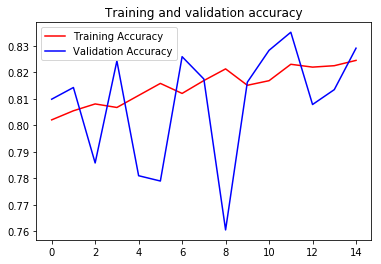

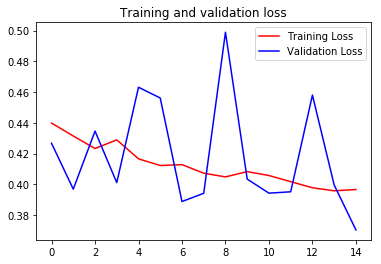

In [57]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', label = "Training Accuracy")
plt.plot(epochs, val_acc, 'b', label = "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', label = "Training Loss")
plt.plot(epochs, val_loss, 'b', label = "Validation Loss")


plt.title('Training and validation loss')
plt.legend()


# Desired output. Charts with training and validation metrics. No crash :)

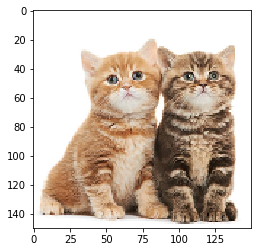

[0.27502933]
cat1.jpg is a cat


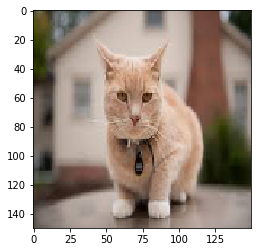

[0.6702165]
cat2.jpeg is a dog


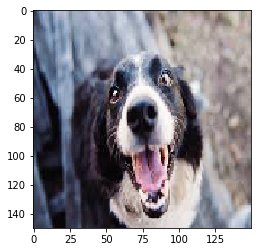

[0.9550583]
dog1.jpeg is a dog


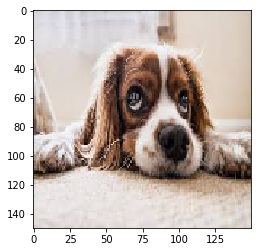

[0.53499794]
dog2.jpeg is a dog


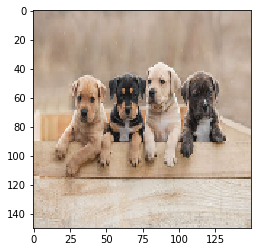

[0.6749063]
dog3.jpg is a dog


In [58]:
# Here's a codeblock just for fun. You should be able to upload an image here 
# and have it classified without crashing

import numpy as np
# from google.colab import files
from keras.preprocessing import image

# uploaded = files.upload()
test_img_dir = '/mnt/external_data/test_images/'
files = ['cat1.jpg', 'cat2.jpeg', 'dog1.jpeg', 'dog2.jpeg', 'dog3.jpg']

# for fn in uploaded.keys():
for file in files:
 
    # predicting images
    #   path = '/content/' + fn
    path = test_img_dir + file
    img = image.load_img(path, target_size=(150, 150))
    x = image.img_to_array(img)
    plt.figure()
    plt.imshow(x.astype(int))   # needs to be integer or else the .inshow does weird scaling
    plt.show()
    x = np.expand_dims(x, axis=0)
    x /= 255  # John added this necessary line!!!

#     images = np.vstack([x])
    images = x
    classes = model.predict(images, batch_size=10)
    print(classes[0])
    if classes[0]>0.5:
        print(file + " is a dog")
    else:
        print(file + " is a cat")